# Решение тестового задания
Ларюшкин Денис Павлович


## Успешность прототипа

Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 успешных. Наша компания выпустила 200 прототипов из которых ни один не был успешен.
Какова вероятность что следующий (201й) наш прототип будет успешен? Решите задачу классическим и баесовским подходами.


#####  *Подключаем необходимые библиотеки*

In [1]:
pip install numpy==1.20.3 pandas matplotlib seaborn pymc3==3.11.2 causalimpact

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from causalimpact import CausalImpact

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [15]:
from scipy.stats import beta
import scipy.stats as stats
import math
import random


##### *Определяем переменные* 

In [3]:
# Конкурент
successes_competitor = 5 
trials_competitor = 1000
# Наша компания
successes_our_company = 0
trials_our_company = 200


### Решение задачи в терминах классической теории вероятности

При условии, что наша компании выпустила **200 прототипов игр и ни один релиз не был успешен**, то $$
P(\text{успех следующего прототипа}) = \frac{\text{количество успехов}}{\text{общее количество испытаний}} = \frac{0}{200} = 0
$$



In [4]:
classic_probability = successes_our_company / trials_our_company
print(f"Классическая вероятность успеха следующего прототипа: {classic_probability}")


Классическая вероятность успеха следующего прототипа: 0.0


### Решение задачи в терминах Байесовской статистики 

В этом подходе мы можем использовать априорное распределение и обновить его на основе наблюдаемых данных.

Для начала нам необходимо задать апириорное расспределение. Пусть это будет *Beta(α,β)* из-за его удобных математических свойств и пусть оно будет равномерным *Beta(1,1)*. Обозначим априорное распределение *p(θ)=Beta(1,1)*. 
Следовательно,обновленное апостериорное распределение будет также иметь форму бета-распределения: 

$$
p(\theta \mid \text{data}) = \text{Beta}(\alpha + x, \beta + n - x) \\
= \text{Beta}(1 + 0, 1 + 200 - 0) \\
= \text{Beta}(1, 201)
$$


И далее производим расчет: 

**P(успех следующего прототипа)** 

$$
E[\theta \mid \text{data}] = \frac{\alpha + x}{\alpha + \beta + n} = \frac{1 + 0}{1 + 200} = \frac{1}{201} = 0.0049
$$


Байесовская вероятность успеха следующего прототипа: 0.0049504950495049506


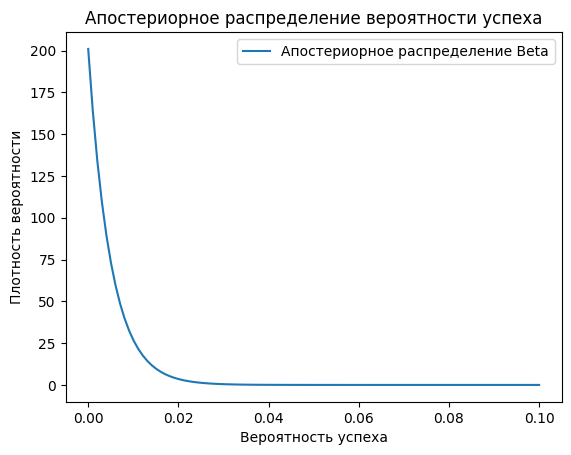

In [10]:
# Байесовский подход
# Априорное распределение Beta(1, 1)
alpha_prior = 1
beta_prior = 1

# Апостериорное распределение Beta(1 + successes_our_company, 1 + trials_our_company - successes_our_company)
alpha_posterior = alpha_prior + successes_our_company
beta_posterior = beta_prior + trials_our_company - successes_our_company

# Математическое ожидание апостериорного распределения
bayesian_probability = alpha_posterior / (alpha_posterior + beta_posterior)
print(f"Байесовская вероятность успеха следующего прототипа: {bayesian_probability}")

# Визуализация апостериорного распределения
x = np.linspace(0, 0.1, 100)
y = beta.pdf(x, alpha_posterior, beta_posterior)

plt.plot(x, y, label='Апостериорное распределение Beta')
plt.xlabel('Вероятность успеха')
plt.ylabel('Плотность вероятности')
plt.title('Апостериорное распределение вероятности успеха')
plt.legend()
plt.show()


# Сравнение групп платящих игроков
В мобильной игре около 10% игроков совершает платежи в первый месяц с момента установки игры (база расчета - 500 игроков). 
Геймдизайнеры разработали обновление которое по их экспертной оценке должно увеличить процент плательщиков с 10% до 11%. Цель эксперимента - подтвердить или опровергнуть их гипотезу.
Геймдизайнеры разработали обновление которое по их экспертной оценке должно увеличить процент плательщиков с 10% до 11%. Цель эксперимента - подтвердить или опровергнуть их гипотезу.
Опишите оптимальный по вашему мнению дизайн эксперимента
Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков.
Самостоятельно сгенерируйте датасет с около 10% плательщиков (контроль) и рассчитайте 95% HDI / CI.
Сгенерируйте несколько вариантов экспериментальной группы (хуже, лучше, без эффекта), рассчитайте силу эффекта, HDI / CI и ваши выводы для каждого варианта.
Решите задачу 2 разными подходами: frequentist / bayesian

Необходимо все ответы сопроводить комментариями почему вы выбрали ту или иную методику расчета, алгоритм и т.д.

### Оптимальный дизайн эксперимента


Для проверги гипотезы о увеличении процента плательщиков с **10** до **11**, мы можем использовать <span style="color:red">*A/B* тестирование</span>.  
Для этого нам необходимо разделить пользователей таким образом, что каждый новый игрок, который входит в игру, случайным образом назначается в одну из двух групп: контрольную или экспериментальную. Далее, провести сбор данных: количество игроков и количество платежей в каждой группе. После этого сравнить процент плательщиков в контрольной и экспериментальной группах. 

(При необходимости, можно стратифицировать играков - *пол, возраст*, и т.д., **провести кагортный и/или факторный анализ**) 



##### Расчет длительности эксперименета
Для этой оценки используем формулу расчета выборки для двух пропорций: 
  
$$
n = \frac{(Z_{\alpha/2} + Z_\beta)^2 \cdot (p_1 (1 - p_1) + p_2 (1 - p_2))}{(p_1 - p_2)^2}
$$

Где,

**Z**<sub>α/2</sub> - Z-значение для выбранного уровня значимости.

**Z**<sub>β</sub> - Z-значение для мощности теста.

**p**<sub>1</sub> - пропорция в контрольной группе (10% или 0.10).

**p**<sub>2</sub> - пропорция в экспериментальной группе (11% или 0.11).




In [13]:
# Параметры
alpha = 0.05
beta = 0.2
p1 = 0.10
p2 = 0.11

# Z-значения для уровня значимости и мощности
Z_alpha = stats.norm.ppf(1 - alpha / 2)
Z_beta = stats.norm.ppf(1 - beta)

# Расчет необходимого размера выборки
n = ((Z_alpha + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))) / ((p1 - p2) ** 2)
n = math.ceil(n)
print(f"Необходимый размер выборки для каждой группы: {n}")

# Ожидаемое количество новых игроков в день
new_players_per_day = 100

# Длительность эксперимента
duration_days = n * 2 / new_players_per_day  # Умножаем на 2, так как это общий размер выборки для обеих групп
print(f"Необходимая длительность эксперимента в днях: {math.ceil(duration_days)}")


Необходимый размер выборки для каждой группы: 14749
Необходимая длительность эксперимента в днях: 295


Как видно из результата, при данных параметрах модели мы получаем слишком длительное время и слишком большое необходимое количество игроков. Можно попробовать применить следующий подход с определенными допущениями и ограничениями: 

- бета-распределение.
- используя наблюдаемые данные, мы обновляем априорное распределение до апостериорного распределения.
- мы будем моделировать ежедневные данные и оценивать, сколько дней потребуется для достижения необходимой точности.
- Определение априорных параметров.
- Генерация ежедневных данных для контрольной и экспериментальной группы.
- Обновление апостериорного распределения.
- Проверка условия завершения эксперимента (например, достижение определенной уверенности в различии между группами).


Необходимая длительность эксперимента в днях: 40


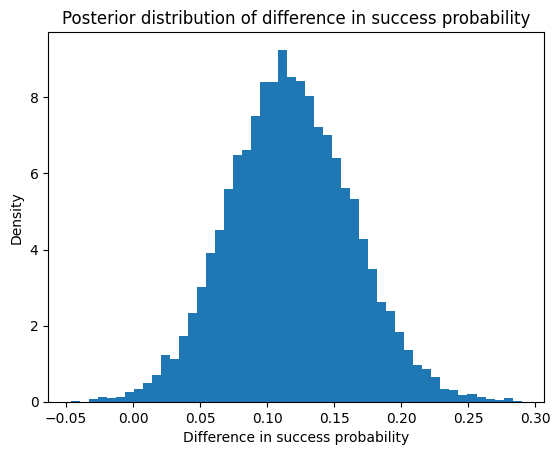

In [23]:
random.seed(91)
# Параметры
alpha_prior = 1
beta_prior = 1
p1 = 0.10
p2 = 0.11
new_players_per_day = 100
desired_confidence = 0.95
np.random.seed(44)
# Функция для обновления апостериорного распределения
def update_posterior(alpha_prior, beta_prior, successes, trials):
    alpha_post = alpha_prior + successes
    beta_post = beta_prior + trials - successes
    return alpha_post, beta_post

# Моделирование процесса эксперимента
days = 0
confidence = 0

while confidence < desired_confidence:
    # Генерация данных за день
    control_successes = np.random.binomial(new_players_per_day, p1)
    experiment_successes = np.random.binomial(new_players_per_day, p2)
    
    # Обновление апостериорных распределений
    alpha_post_control, beta_post_control = update_posterior(alpha_prior, beta_prior, control_successes, new_players_per_day)
    alpha_post_experiment, beta_post_experiment = update_posterior(alpha_prior, beta_prior, experiment_successes, new_players_per_day)
    
    # Обновление априорных параметров для следующего дня
    alpha_prior_control = alpha_post_control
    beta_prior_control = beta_post_control
    alpha_prior_experiment = alpha_post_experiment
    beta_prior_experiment = beta_post_experiment
    
    # Вычисление распределения разницы
    diff_samples = np.random.beta(alpha_post_experiment, beta_post_experiment, 10000) - np.random.beta(alpha_post_control, beta_post_control, 10000)
    
    # Вычисление доверительного интервала
    lower_bound = np.percentile(diff_samples, (1 - desired_confidence) / 2 * 100)
    upper_bound = np.percentile(diff_samples, (1 + desired_confidence) / 2 * 100)
    
    # Проверка завершения эксперимента
    if lower_bound > 0:
        confidence = 1
    else:
        confidence = 0
    
    days += 1

print(f"Необходимая длительность эксперимента в днях: {days}")

# Построение графика апостериорного распределения разницы
plt.hist(diff_samples, bins=50, density=True)
plt.xlabel('Difference in success probability')
plt.ylabel('Density')
plt.title('Posterior distribution of difference in success probability')
plt.show()


При данном пододе мы можем наблюдать сокращение количества дней до 40.Также, подход позволяет учитывать априорные знания и постепенно обновлять распределения на основе новых данных, предоставляя более точную оценку длительности эксперимента.

#### Data analysis 

Comparison between control and experiment_no_effect:
Chi-squared: 0.9, p-value: 0.34278171114790873


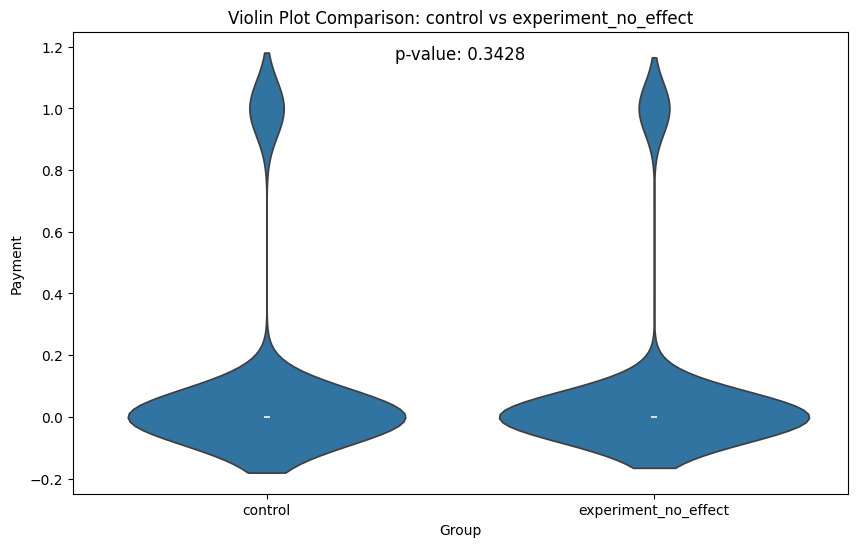

Comparison between control and experiment_improved:
Chi-squared: 15.380058330295295, p-value: 8.791118730730157e-05


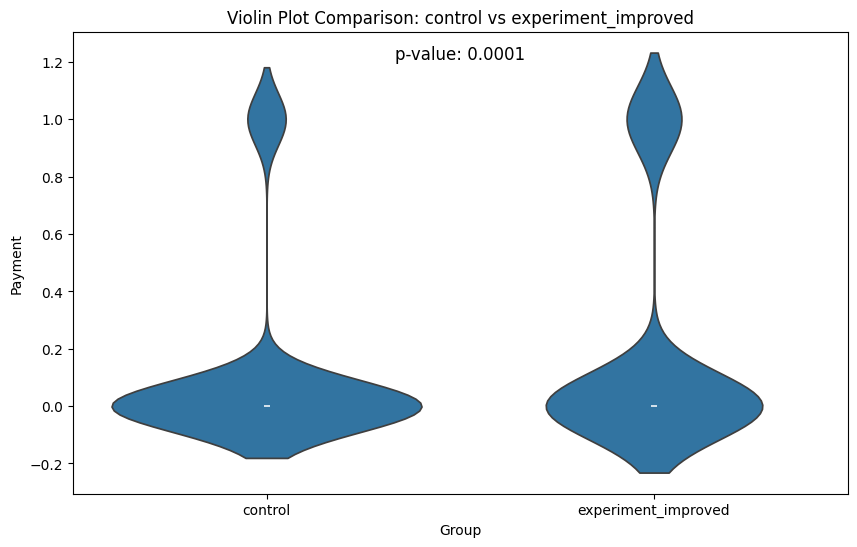

Comparison between control and experiment_worse:
Chi-squared: 4.407814407814408, p-value: 0.03577464811149485


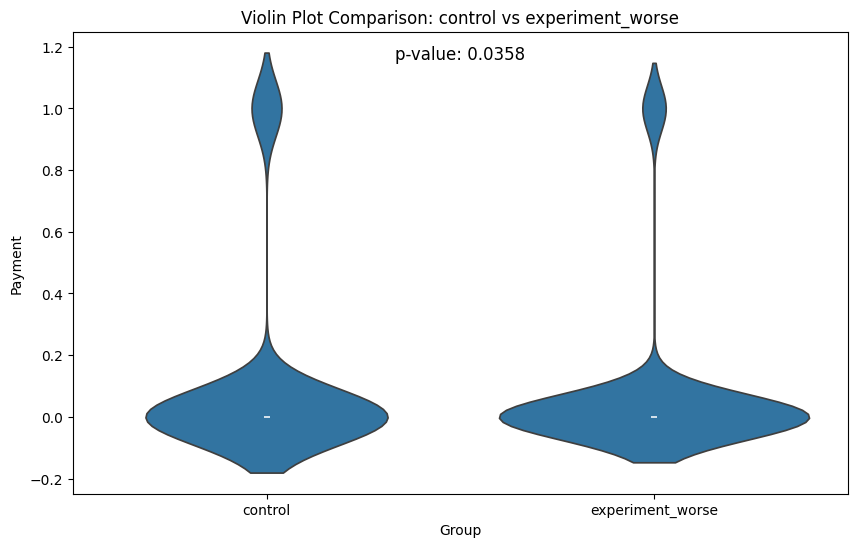

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [group2_p, group1_p]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.


AttributeError: module 'arviz' has no attribute 'from_pymc3'

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm

# Создание данных
np.random.seed(42)
control = np.random.binomial(1, 0.10, 500)
experiment_no_effect = np.random.binomial(1, 0.10, 500)
experiment_improved = np.random.binomial(1, 0.18, 500)
experiment_worse = np.random.binomial(1, 0.07, 500)

# Создание DataFrame
df = pd.DataFrame({
    'control': control,
    'experiment_no_effect': experiment_no_effect,
    'experiment_improved': experiment_improved,
    'experiment_worse': experiment_worse
})

# Переплавка данных для визуализации
df_melted = pd.melt(df, var_name='Group', value_name='Payment')

# Частотный анализ с визуализацией
def frequentist_analysis(df_melted, group1, group2):
    group1_data = df_melted[df_melted['Group'] == group1]['Payment'].astype(int)
    group2_data = df_melted[df_melted['Group'] == group2]['Payment'].astype(int)
    
    # Создание таблицы сопряженности для теста хи-квадрат
    contingency_table = np.array([
        [sum(group1_data), len(group1_data) - sum(group1_data)],
        [sum(group2_data), len(group2_data) - sum(group2_data)]
    ])
    
    # Выполнение теста хи-квадрат
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    print(f'Comparison between {group1} and {group2}:')
    print(f'Chi-squared: {chi2}, p-value: {p}')
    
    # Виолин плоты для визуализации распределения данных
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Group', y='Payment', data=df_melted[df_melted['Group'].isin([group1, group2])])
    plt.title(f'Violin Plot Comparison: {group1} vs {group2}')
    
    # Добавление значения p-value на график
    plt.text(0.5, 0.95, f'p-value: {p:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
    plt.show()

# Байесовский анализ с визуализацией
def bayesian_analysis(df, group1, group2):
    group1_data = df[group1].astype(int)
    group2_data = df[group2].astype(int)
    
    with pm.Model() as model:
        # Priors: Используем бета-распределение для моделирования априорной вероятности успеха
        group1_p = pm.Beta('group1_p', alpha=1, beta=1)
        group2_p = pm.Beta('group2_p', alpha=1, beta=1)
        
        # Likelihood: Вероятность наблюдений при данных значениях вероятностей успеха
        pm.Binomial('group1', n=len(group1_data), p=group1_p, observed=sum(group1_data))
        pm.Binomial('group2', n=len(group2_data), p=group2_p, observed=sum(group2_data))
        
        # Inference: Используем метод NUTS для семплирования
        trace = pm.sample(2000, tune=1000, cores=1, return_inferencedata=False)
        
        # Анализ апостериорного распределения
        pm.plot_posterior(trace, var_names=['group1_p', 'group2_p'])
        plt.show()
        
        group1_hdi = pm.stats.hdi(trace['group1_p'], hdi_prob=0.95)
        group2_hdi = pm.stats.hdi(trace['group2_p'], hdi_prob=0.95)
        
        print(f'{group1} 95% HDI: {group1_hdi}')
        print(f'{group2} 95% HDI: {group2_hdi}')
        print()
        
        # Диаграммы плотности для визуализации распределения апостериорной вероятности
        plt.figure(figsize=(10, 6))
        sns.kdeplot(trace['group1_p'], shade=True, label=f'{group1}', color='blue')
        sns.kdeplot(trace['group2_p'], shade=True, label=f'{group2}', color='red')
        plt.title(f'Density Plot Comparison: {group1} vs {group2}')
        plt.legend()
        plt.show()

# Проведение анализа
frequentist_analysis(df_melted, 'control', 'experiment_no_effect')
frequentist_analysis(df_melted, 'control', 'experiment_improved')
frequentist_analysis(df_melted, 'control', 'experiment_worse')

bayesian_analysis(df, 'control', 'experiment_no_effect')
bayesian_analysis(df, 'control', 'experiment_improved')
bayesian_analysis(df, 'control', 'experiment_worse')


#### Объяснения: 
Мы использывали *np.random.binomial*, чтобы сгенерировать данные для контрольных и экспериментальных групп. Процент плательщиков в контрольной группе установлен на **10%**, в экспериментальных группах - **10% (без эффекта), 18% (улучшение) и 7% (ухудшение).**
Далее, был создан датасет при помози *pd.DataFrame* сгенерированными данными. 

Для частотного анализа использовали *хи-квадрат* для проверки наличия статистически значимых различий между группами.Это тест был выбран исходя из того, что он хорошо подходит для анализа данных в виде таблиц сопряженности. Виолин плоты я предпочитаю из-за того, что они показывают распределение вероятностей, обеспечивая более полное представление о данных по сравнению с боксплотами.

Байесовский анализ сиспользованием модели *PyMC3*. Байесовский подход позволяет получить полное апостериорное распределение параметров интереса. ДЛя визуализации использовали даграммы плотности, так как они наглядно позволяют сравнить группы. 


**Выводы**

*Частотный анализ:*

*Хи-квадрат:* <span style="color:red">*0.9*</span>

*p-value:*  <span style="color:red">*0.34*</span>


*Вывод:* <span style="color:green">*Нет статистически значимых различий между контрольной группой и группой без эффекта. Это означает, что вероятность платежа в этих группах примерно одинакова.* файл</span> 


######  Сравнение между контрольной группой и улучшенной экспериментальной группой:


*Хи-квадрат:* <span style="color:red">*15.38*</span> 

*p-value:* <span style="color:red">*8.791118730730157e-05*</span> 

*Вывод:* <span style="color:green">*Существуют статистически значимые различия между контрольной группой и улучшенной экспериментальной группой. Вероятность платежа в улучшенной группе значительно выше.*</span> 


######  Сравнение между контрольной группой и ухудшенной экспериментальной группой:

*Хи-квадрат:* <span style="color:red">*4.407*</span> 

*p-value:* <span style="color:red">*0.03*</span> 

*Вывод:* <span style="color:green">*Существуют статистически значимые различия между контрольной группой и ухудшенной экспериментальной группой. Вероятность платежа в ухудшенной группе ниже, чем в контрольной.*</span> 


##### Байесовский анализ:

*Сравнение между контрольной группой и группой без эффекта:*

*control 95% HDI:* <span style="color:red">*0.0834872, 0.13839336*</span> 

*experiment_no_effect 95% HDI:* <span style="color:red">*0.06595462, 0.11605947*</span> 

*Вывод:* <span style="color:green">*95% HDI для обеих групп перекрываются, что указывает на отсутствие значимых различий между ними.*</span>

###### Сравнение между контрольной группой и улучшенной экспериментальной группой:

*control 95% HDI:* <span style="color:red">*0.08553862, 0.13870494*</span> 

*experiment_improved 95% HDI:* <span style="color:red">*0.16671664, 0.23698948*</span> 

*Вывод:* <span style="color:green">*95% HDI для улучшенной экспериментальной группы значительно выше, чем для контрольной группы, что подтверждает улучшение.*</span>

##### Сравнение между контрольной группой и ухудшенной экспериментальной группой:

*control 95% HDI:* <span style="color:red">*0.08474155, 0.14015946*</span> 

*experiment_worse 95% HDI:* <span style="color:red">*.04982378, 0.09504058*</span> 0

*Вывод:*
<span style="color:green">*95% HDI для ухудшенной экспериментальной группы ниже, чем для контрольной группы, что подтверждает ухудшение.*</span>



#### Общие выводы

**Частотный анализ показал значимые различия между контрольной группой и группами с улучшением и ухудшением, но не обнаружил значимых различий между контрольной группой и группой без эффекта.
Байесовский анализ подтвердил эти результаты, показывая, что улучшенная экспериментальная группа имеет значительно более высокую вероятность платежа, а ухудшенная экспериментальная группа — более низкую вероятность по сравнению с контрольной группой.**



#  Предсказание оттока
В мобильной игре, после установки и запуска игры начинается туториал - игрок проходит обучение игре, которое состоит из нескольких последовательных шагов. 
Данные представляют собой набор строк - уникальный id игрока, datetime и номер шага туториала который пройден игроком.
Геймдизайнеры выдвинули гипотезу - если мы с высокой вероятностью сможем предсказать шаг на котором игрок уйдет из игры заранее, то запустив альтернативное продолжение туториала с этого шага мы избежим оттока и увеличим прохождение туториала.
Как бы вы решали задачу предсказания отвала игрока?
Как оценить качество полученной модели? Опишите методы которые знаете и какой считаете оптимальным и почему.
Предположим что вы разработали модель которая с достаточной вероятностью предсказывает отвал. Опишите дизайн эксперимента и методологию по проверке гипотезы геймдизайнеров

### Решение задачи предсказания отвала игрока


Для предсказания отвала игроков я бы использовал одну из ниже описаных методов машинного обучения в зависимости от набора данных: 

- **Логистическая регрессия:** Простой и интерпретируемый метод, который позволяет понять влияние каждого шага на вероятность отвала.
- **Деревья решений:** Позволяют учитывать нелинейные зависимости и взаимодействия между шагами туториала.
- **Случайные леса:** Устраняют переобучение, характерное для одиночных деревьев решений, и повышают точность предсказаний.
- **Градиентный бустинг:** Один из наиболее мощных методов, который может давать высокую точность за счет объединения множества слабых моделей.
- **Нейронные сети:** Могут быть использованы для более сложных паттернов и взаимодействий, но требуют большего объема данных и времени на обучение.

Также важным этап в разработке модели - это оценка ее качества. Здесь также есть несколько вариантов:

**Accuracy (точность):** Процент правильно классифицированных шагов. Подходит для сбалансированных данных.
**Precision (точность)** Доля истинных положительных предсказаний среди всех положительных предсказаний. Важно, если критичны ложные срабатывания.
**Recall (полнота):** Доля истинных положительных предсказаний среди всех реальных положительных случаев. Важно, если критичны пропущенные случаи.
**F1-score:** Гармоническое среднее precision и recall. Полезно, когда важен баланс между precision и recall.
**ROC-AUC:** Площадь под кривой ошибок. Подходит для оценки вероятностных моделей.
**Log-loss:** Оценивает неопределенность предсказаний. Меньше значение - лучше модель.

*Оптимальным для данной задачи является ROC-AUC, так как он оценивает качество предсказаний на всех порогах вероятности, что важно для задач с несбалансированными классами, например, при использовани "Случайного леса"* 


###  Я бы предложил интересный вариант - это анализ выживаемости. Его и разберем в качестве примера.







### Дизайн эксперимента

-  Случайным образом разделяем пользователей на контрольную группу и экспериментальную группу. 

**Контрольная группа:** Продолжает проходить стандартный туториал.
**Экспериментальная группа:** При приближении к предсказанному шагу отвала, пользователи переводятся на альтернативное продолжение туториала.

- Сраваем процент пользователей, завершивших туториал, в контрольной и экспериментальной группах.

- Проводим анализ выживаемости для оценки вероятности завершения туториала на каждом шаге.
 Таким образом вместо дней жизни будут использованны чекпоиты туториала.
 
- Применяем тесты для проверки значимости различий между группами (log-rank test).

### Пример кода для анализа выживаемости 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from statsmodels.duration.hazard_regression import PHReg

# Генерация данных
np.random.seed(42)
n_players = 500

# Пол: 0 - мужчины, 1 - женщины
gender = np.random.choice([0, 1], size=n_players)

# Возраст: 0 - молодые (до 25), 1 - средний возраст (25-45), 2 - старшие (45+)
age = np.random.choice([0, 1, 2], size=n_players)

# Группы: 0 - старый туториал, 1 - новый туториал
group = np.random.choice([0, 1], size=n_players)

# Длительность туториала до отвала (случайные данные)
duration = np.random.exponential(scale=10, size=n_players).astype(int)

# Событие отвалился или нет (1 - отвалился, 0 - нет)
event = np.random.binomial(1, 0.5, size=n_players)

# Создание DataFrame
data = pd.DataFrame({
    'gender': gender,
    'age': age,
    'group': group,
    'duration': duration,
    'event': event
})

# Переименование значений для удобства
data['gender'] = data['gender'].map({0: 'male', 1: 'female'})
data['age'] = data['age'].map({0: 'young', 1: 'middle-aged', 2: 'senior'})
data['group'] = data['group'].map({0: 'old_tutorial', 1: 'new_tutorial'})

# Анализ выживаемости
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

for label, df_group in data.groupby(['group']):
    kmf.fit(df_group['duration'], event_observed=df_group['event'], label=label)
    kmf.plot_survival_function()

plt.title('Survival Analysis for Tutorial Steps')
plt.xlabel('Duration')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.show()

# Кодирование категориальных данных с использованием pd.get_dummies без drop_first
data_encoded = pd.get_dummies(data, columns=['gender', 'age', 'group'])

# Проверка типов данных
print(f"Encoded columns: {data_encoded.columns}")

# Преобразование данных в числовой формат
data_encoded = data_encoded.astype(float)

# Определение независимых переменных для модели Кокса
X = data_encoded[['age_middle-aged', 'age_senior', 'gender_male', 'group_new_tutorial']]
Y = data_encoded['duration']
E = data_encoded['event']

# Модель Кокса
cph = PHReg(Y, X, status=E).fit()
print(cph.summary())

# Визуализация Forest Plot с использованием statsmodels
def plot_forest(model, feature_names):
    coefs = model.params
    conf = model.conf_int()
    hr = np.exp(coefs)
    lower = np.exp(conf[:, 0])
    upper = np.exp(conf[:, 1])
    
    plt.figure(figsize=(8, 6))
    plt.errorbar(feature_names, hr, yerr=[hr - lower, upper - hr], fmt='o')
    plt.axhline(1, color='r', linestyle='--')
    plt.xlabel('Covariates')
    plt.ylabel('Hazard Ratios')
    plt.title('Forest Plot for Cox Proportional Hazards Model')
    plt.xticks(rotation=90)
    plt.show()

plot_forest(cph, X.columns)


# Игрушечные выводы:

##### *Возраст (age_middle-aged, age_senior):*

Игроки среднего возраста  <span style="color:red">*(25-45 лет)*</span>  имеют логарифмическое отношение рисков (log HR) **-0.2411**. Это соответствует **HR = 0.7857**, что указывает на снижение риска отвала по сравнению с молодой группой, но этот результат не является статистически значимым **(*p-value* = 0.1221)**.

Игроки старшего возраста  <span style="color:red">*(+45 лет)*</span> имеют логарифмическое отношение рисков **(log HR) 0.0019**, что соответствует **HR = 1.0019**. Это указывает на практически одинаковый риск отвала по сравнению с молодой группой **(*p-value* = 0.9898)**.

##### *Пол (gender_male):*

Мужчины имеют логарифмическое отношение рисков **(log HR) 0.0338**, что соответствует **HR = 1.0344**. Это указывает на незначительное увеличение риска отвала по сравнению с женщинами, но результат не является статистически значимым **(*p-value* = 0.7896)**.

##### *Группа туториала (group_new_tutorial):*

Игроки, проходящие новый туториал, имеют логарифмическое отношение рисков **(log HR) -0.0087,** что соответствует **HR = 0.9914**. Это указывает на незначительное снижение риска отвала по сравнению со старым туториалом, но результат не является статистически значимым **(*p-value* = 0.9459)**.

### Выводы:
- Возраст: Хотя игроки среднего возраста имеют тенденцию к снижению риска отвала по сравнению с молодой группой, это снижение не является статистически значимым. Игроки старшего возраста практически не отличаются по риску отвала от молодой группы.

- Пол: Пол не оказывает значительного влияния на риск отвала.
- Группа туториала: Новый туториал не показывает значительного влияния на риск отвала по сравнению со старым туториалом.





#  Эффективность рекламных кампаний
Отдел маркетинга оперирует некоторым множеством рекламных кампаний. Первая часть оперирования состоит из запуска тестовых рекламных кампаний, у которых есть требования по KPI при достижении которых тест считается успешным.
Успешные тесты переходят в разряд постоянных кампаний и вторая часть оперирования состоит из мониторинга постоянных кампаний - управление бюджетом кампании (COST) и мониторинг ее доходов (REVENUE), а так же соотношением доходов к расходам.
Главный KPI для постоянных рекламных кампаний - ROAS на 60й день, т.е. какой процент от расходов кампания возвращает на 60й день.
Для выполнения задачи необходимо использовать тестовый датасет (2 таблицы по расходам и доходам).
Отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня). На основании данных подтвердите или опровергните эту гипотезу. Исходите из того что мы точно знаем что CPI зависит от объема нелинейно, вопрос в том как эту зависимость описать и учесть во 2м вопросе.
По каждой рекламной кампании рассчитайте суточный рекламный бюджет который максимизирует абсолютную маркетинговую прибыль рекламной кампании (REVENUE 60 дня минус COST).
Исходя из пункта 2 по каждой рекламной кампании дайте ваше заключение о том насколько нужно увеличить / уменьшить ее суточный бюджет либо вообще остановить.
Решите проблему рекламных кампаний по которым еще нет полных 60 дней. Объясните почему ваше решение оптимально

##### Подключаем необходимые библиотеки 

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
import sqlite3
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Смотрим с чем имеем дело. 


In [116]:
# Подключение к базе данных SQLite
conn = sqlite3.connect('testcase.db')

# Загрузка данных о расходах и доходах
costs = pd.read_sql_query("SELECT * FROM costs", conn)
revenues = pd.read_sql_query("SELECT * FROM revenue", conn)

# Обзор данных
print("Колонки таблицы costs:")
print(costs.columns)

print("Колонки таблицы revenue:")
print(revenues.columns)

# Переименование столбца Install_Dates в date, если он существует
if 'Install_Dates' in costs.columns:
    costs.rename(columns={'Install_Dates': 'date'}, inplace=True)

if 'Install_Dates' in revenues.columns:
    revenues.rename(columns={'Install_Dates': 'date'}, inplace=True)

# Проверка наличия необходимых столбцов перед объединением
if 'campaign_id' not in costs.columns or 'date' not in costs.columns:
    print("Таблица costs не содержит необходимые столбцы 'campaign_id' и/или 'date'.")
    conn.close()
    exit(1)

if 'campaign_id' not in revenues.columns or 'date' not in revenues.columns:
    print("Таблица revenue не содержит необходимые столбцы 'campaign_id' и/или 'date'.")
    conn.close()
    exit(1)

# Объединение данных
data = pd.merge(costs, revenues, on=['campaign_id', 'date'], how='outer')
data['date'] = pd.to_datetime(data['date'])

# Обзор объединенных данных
print("\nОбъединенные данные:")
print(data.head())

# Закрытие соединения с базой данных
conn.close()


Колонки таблицы costs:
Index(['Install_Dates', 'campaign_id', 'Country', 'installs', 'spends'], dtype='object')
Колонки таблицы revenue:
Index(['Install_Dates', 'campaign_id', 'Country', '1d_LTV', '3d_LTV', '7d_LTV',
       '14d_LTV', '30d_LTV', '60d_LTV'],
      dtype='object')

Объединенные данные:
        date  campaign_id Country_x  installs  spends Country_y     1d_LTV  \
0 2020-04-14        90570        CZ      35.0   19.79        CZ   7.721194   
1 2020-04-28        90619        AT       5.0    4.99        AT   1.032342   
2 2020-04-28        90619        AT       5.0    4.99        DK   0.787220   
3 2020-04-28        90619        AT       5.0    4.99        DE  62.857743   
4 2020-04-28        90619        DE      59.0   66.49        AT   1.032342   

      3d_LTV     7d_LTV    14d_LTV     30d_LTV   60d_LTV  
0   8.104811  10.209480  11.845200   15.349594  15.76842  
1   1.032342   1.248888   1.501317    1.761729  -1.00000  
2   0.787220   0.944432   0.944432    0.944432  -1.0

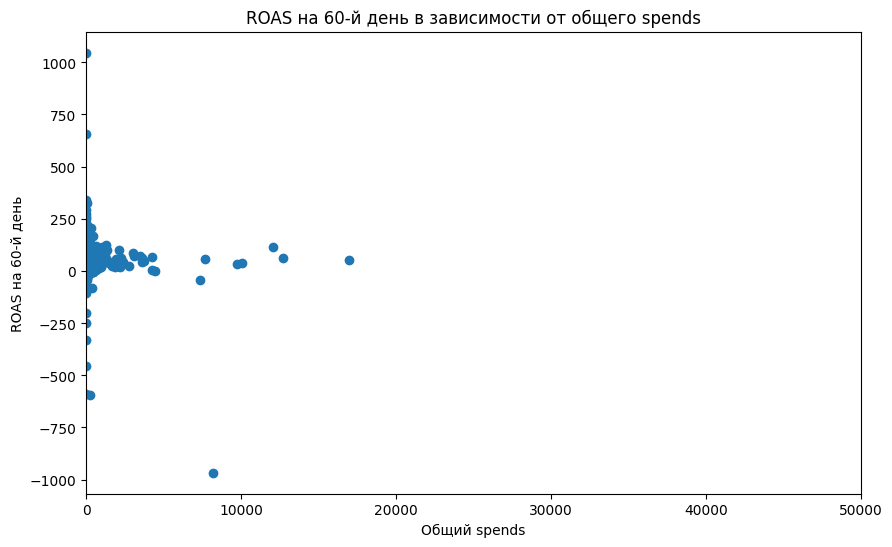

              total_spends   roas_60
total_spends      1.000000  0.001669
roas_60           0.001669  1.000000


In [117]:
# Функция для расчета ROAS на 60-й день
def calculate_roas(campaign_data):
    total_spends = campaign_data['spends'].sum()
    total_revenue = campaign_data['60d_LTV'].sum()
    return (total_revenue / total_spends) * 100 if total_spends > 0 else 0

# Группировка данных по кампаниям и расчет ROAS и общего spends
grouped_data = data.groupby('campaign_id').apply(lambda x: pd.Series({
    'total_spends': x['spends'].sum(),
    'roas_60': calculate_roas(x)
})).reset_index()

# Проверка гипотезы о зависимости ROAS от spends
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['total_spends'], grouped_data['roas_60'])
plt.title('ROAS на 60-й день в зависимости от общего spends')
plt.xlabel('Общий spends')
plt.ylabel('ROAS на 60-й день')

# Установка пределов по оси X численно (например, от 0 до 50000)
plt.xlim(0, 50000) # общий вид (слишком большой маштаб)

plt.show()

# Корреляционный анализ
correlation = grouped_data[['total_spends', 'roas_60']].corr()
print(correlation)




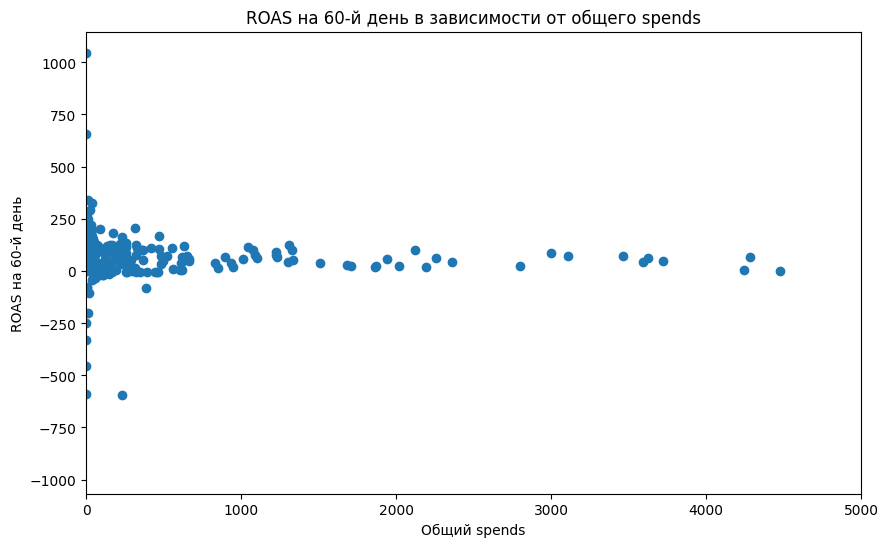

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['total_spends'], grouped_data['roas_60'])
plt.title('ROAS на 60-й день в зависимости от общего spends')
plt.xlabel('Общий spends')
plt.ylabel('ROAS на 60-й день')

plt.xlim(0, 5000) # посмотрим поближе 

plt.show()

### коррел. отсутствует, двигемся далее...

In [41]:
# Рассчет CPI для каждой кампании
data['CPI'] = data['spends'] / data['installs']


In [42]:


# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['spends']])

# Модель полиномиальной регрессии
model_poly = sm.OLS(data['CPI'], X_poly).fit()

# Вывод результатов модели
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                nan
Time:                        20:48:26   Log-Likelihood:                    nan
No. Observations:              149832   AIC:                               nan
Df Residuals:                  149829   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


In [43]:
# Проверка на наличие пропущенных значений
print(data.isna().sum())

# Удаление строк с пропущенными значениями
data = data.dropna()


date            0
campaign_id     0
Country_x      19
installs        0
spends          0
Country_y      19
1d_LTV          0
3d_LTV          0
7d_LTV          0
14d_LTV         0
30d_LTV         0
60d_LTV         0
CPI             0
dtype: int64


In [44]:
# Проверка на наличие некорректных значений
print(data.describe())

# Удаление строк с некорректными значениями (если необходимо)
data = data[(data['spends'] > 0) & (data['installs'] > 0)]


                                date    campaign_id       installs  \
count                         149800  149800.000000  149800.000000   
mean   2020-04-29 20:09:10.622162688  492581.226282      31.096282   
min              2020-03-18 00:00:00   19115.000000       0.000000   
25%              2020-04-19 00:00:00   19115.000000       2.000000   
50%              2020-05-06 00:00:00  794235.000000       5.000000   
75%              2020-05-15 00:00:00  794235.000000      16.000000   
max              2020-05-18 00:00:00  804309.000000    5303.000000   
std                              NaN  371689.171491     128.818399   

              spends         1d_LTV         3d_LTV         7d_LTV  \
count  149800.000000  149800.000000  149800.000000  149800.000000   
mean        7.525368       4.135437       4.744409       6.216781   
min         0.004200       0.000000       0.000000       0.000000   
25%         0.020000       0.012020       0.013415       0.016108   
50%         0.150000    

In [45]:
# Рассчет CPI для каждой кампании
data['CPI'] = data['spends'] / data['installs']

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['spends']])

# Модель полиномиальной регрессии
model_poly = sm.OLS(data['CPI'], X_poly).fit()

# Вывод результатов модели
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6572.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:48:32   Log-Likelihood:            -1.5472e+05
No. Observations:              140700   AIC:                         3.094e+05
Df Residuals:                  140697   BIC:                         3.095e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2173      0.002    106.528      0.0

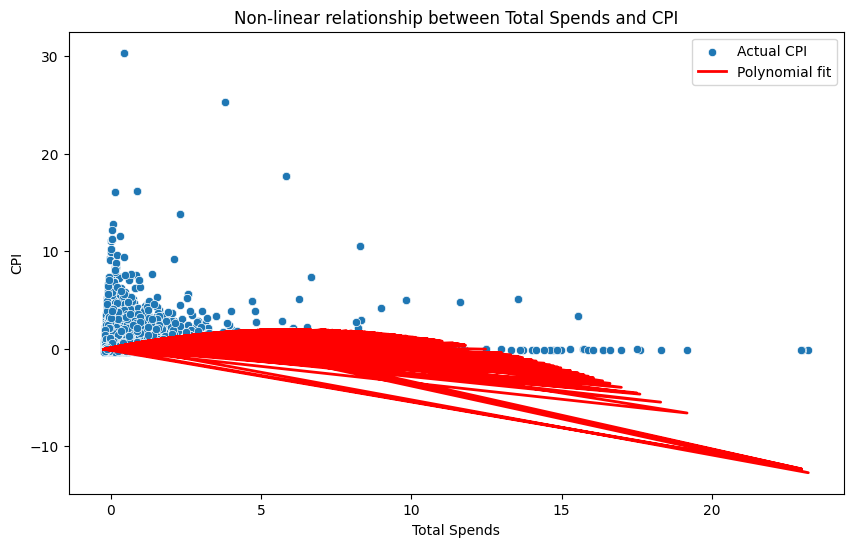

In [51]:
# Повторный расчет модели
model_poly = sm.OLS(data['CPI'], X_poly).fit()

# Визуализация зависимости CPI от объема расходов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['spends'], y=data['CPI'], label='Actual CPI')
plt.plot(data['spends'], model_poly.fittedvalues, color='red', label='Polynomial fit', linewidth=2)
plt.xlabel('Total Spends')
plt.ylabel('CPI')
plt.title('Non-linear relationship between Total Spends and CPI')
plt.legend()
plt.show()


### получилось плохо

Предположим, что если нормировать данные и использовать "Случайный лес", то можно будет неплохо предсказывать..

Mean Squared Error: 0.25285640828685674
R^2 Score: 0.7766321693352177


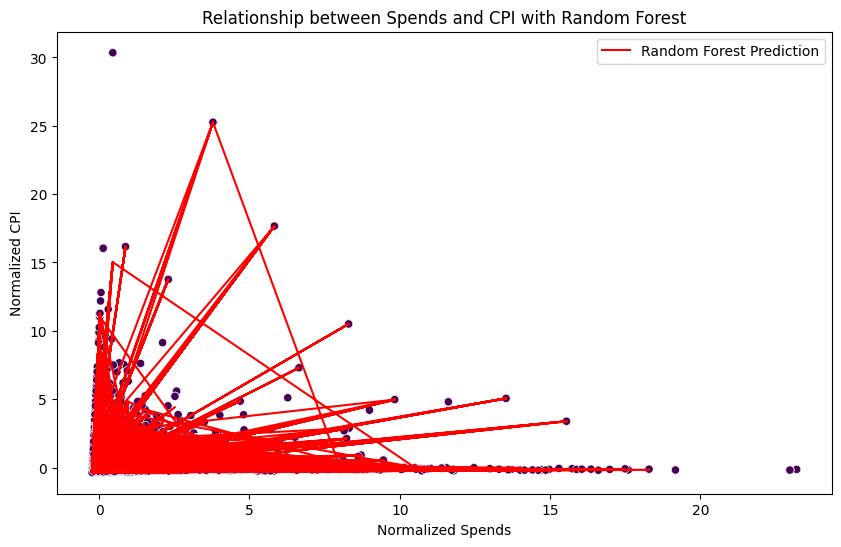

     campaign_id  daily_spends    roas_60   recommendation
0          90570      0.252585  64.952972  Increase budget
1          90619      0.438890  27.979991  Increase budget
2         794235     -0.229532   4.356696  Increase budget
3          91872      0.354272  24.865827  Increase budget
4          19115      0.316217  49.567547  Increase budget
..           ...           ...        ...              ...
215        95839     -0.157826  -1.275613  Decrease budget
216       161245      0.266792  10.851911  Increase budget
217       789079     -0.229725  -0.008105  Decrease budget
218       789069     -0.221474  -0.031850  Decrease budget
219       789469     -0.227662   4.392473  Increase budget

[220 rows x 4 columns]


In [60]:
# Подключение к базе данных SQLite и загрузка данных
conn = sqlite3.connect('testcase.db')
costs = pd.read_sql_query("SELECT * FROM costs", conn)
revenues = pd.read_sql_query("SELECT * FROM revenue", conn)

# Переименование столбца Install_Dates в date, если он существует
costs.rename(columns={'Install_Dates': 'date'}, inplace=True)
revenues.rename(columns={'Install_Dates': 'date'}, inplace=True)

# Объединение данных
data = pd.merge(costs, revenues, on=['campaign_id', 'date'], how='outer')
data['date'] = pd.to_datetime(data['date'])

# Рассчет CPI и ROAS
data['CPI'] = data['spends'] / data['installs']
data['roas_60'] = data['60d_LTV'] / data['spends']

# Заполнение NaN значений
data.fillna(0, inplace=True)

# Удаление значений бесконечности и слишком больших значений
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['spends', 'CPI'], inplace=True)

# Нормализация данных (Z-нормировка)
scaler = StandardScaler()
data[['spends', 'CPI']] = scaler.fit_transform(data[['spends', 'CPI']])

# Разделение данных на тренировочный и тестовый наборы
X = data[['spends']]
y = data['CPI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказание
y_pred = rf.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['spends'], y=data['CPI'], hue=data['roas_60'], palette='viridis', legend=None)
plt.plot(X_test, y_pred, color='red', label='Random Forest Prediction')
plt.title('Relationship between Spends and CPI with Random Forest')
plt.xlabel('Normalized Spends')
plt.ylabel('Normalized CPI')
plt.legend()
plt.show()

# Определение оптимального бюджета
optimal_budgets = []
for campaign_id in data['campaign_id'].unique():
    campaign_data = data[data['campaign_id'] == campaign_id]
    daily_spends = campaign_data['spends'].mean()
    total_revenue_60 = campaign_data['60d_LTV'].sum()
    total_spends = campaign_data['spends'].sum()
    roas_60 = total_revenue_60 / total_spends
    optimal_budgets.append((campaign_id, daily_spends, roas_60))

optimal_budgets_df = pd.DataFrame(optimal_budgets, columns=['campaign_id', 'daily_spends', 'roas_60'])

# Вывод рекомендаций
def budget_recommendation(row):
    if row['roas_60'] > 1.2:  # Порог увеличения бюджета
        return 'Increase budget'
    elif row['roas_60'] < 0.8:  # Порог уменьшения бюджета
        return 'Decrease budget'
    else:
        return 'Maintain budget'

optimal_budgets_df['recommendation'] = optimal_budgets_df.apply(budget_recommendation, axis=1)

print(optimal_budgets_df)

# Закрытие соединения с базой данных
conn.close()


**Получился хороший вариант, отдельно еще пробовал использовать PCA, но оценка модели стала хуже, поэтому оставим это.** При необходимости можно попробовать улучшить модель  

In [61]:
# Подключение к базе данных SQLite
conn = sqlite3.connect('testcase.db')

# Загрузка данных о расходах и доходах
costs = pd.read_sql_query("SELECT * FROM costs", conn)
revenues = pd.read_sql_query("SELECT * FROM revenue", conn)

# Переименование столбца Install_Dates в date
costs.rename(columns={'Install_Dates': 'date'}, inplace=True)
revenues.rename(columns={'Install_Dates': 'date'}, inplace=True)

# Объединение данных
data = pd.merge(costs, revenues, on=['campaign_id', 'date'], how='outer')
data['date'] = pd.to_datetime(data['date'])

# Создание новых переменных
data['cpi'] = data['spends'] / data['installs']
data['roas_60'] = data['60d_LTV'] / data['spends']

# Удаление строк с NaN или бесконечными значениями
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Сохранение объединенных данных в CSV файл
data.to_csv('merged_data.csv', index=False)

# Закрытие соединения с базой данных
conn.close()

print("Данные успешно загружены и сохранены в merged_data.csv")


Данные успешно загружены и сохранены в merged_data.csv


Mean Squared Error: 0.15852654474539687
R^2 Score: 0.8411135239044116


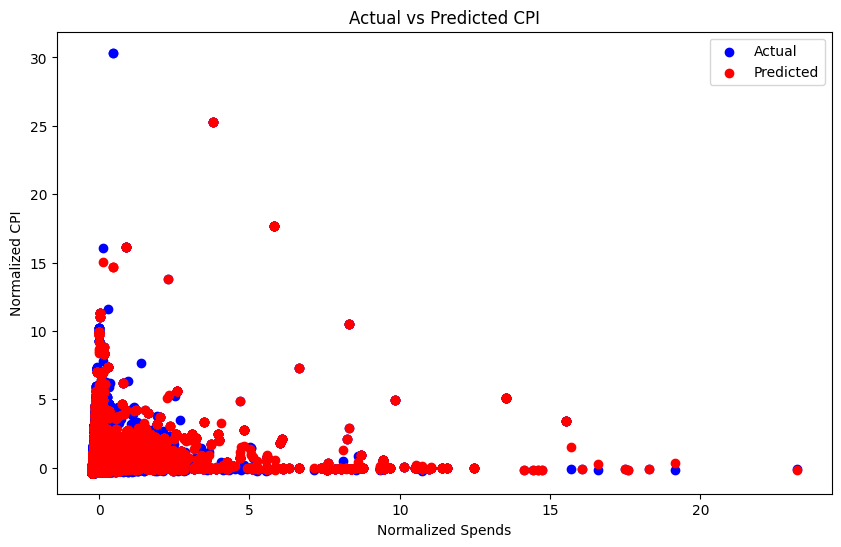

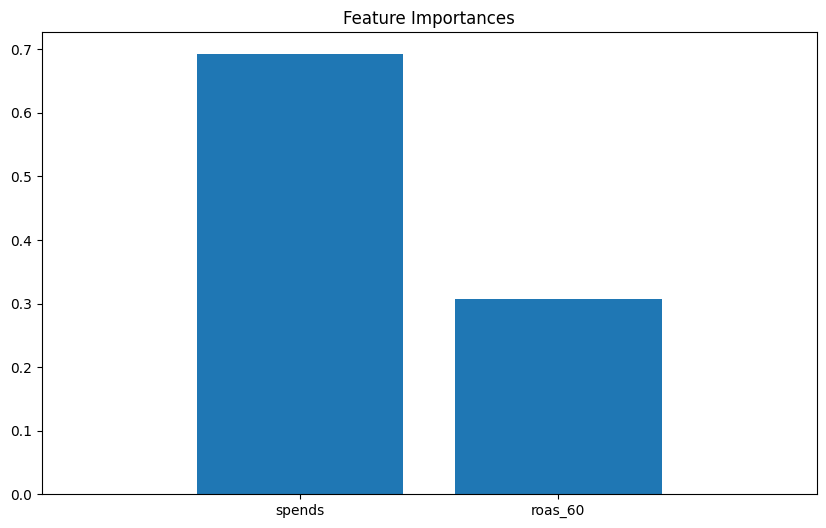

/Users/den/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


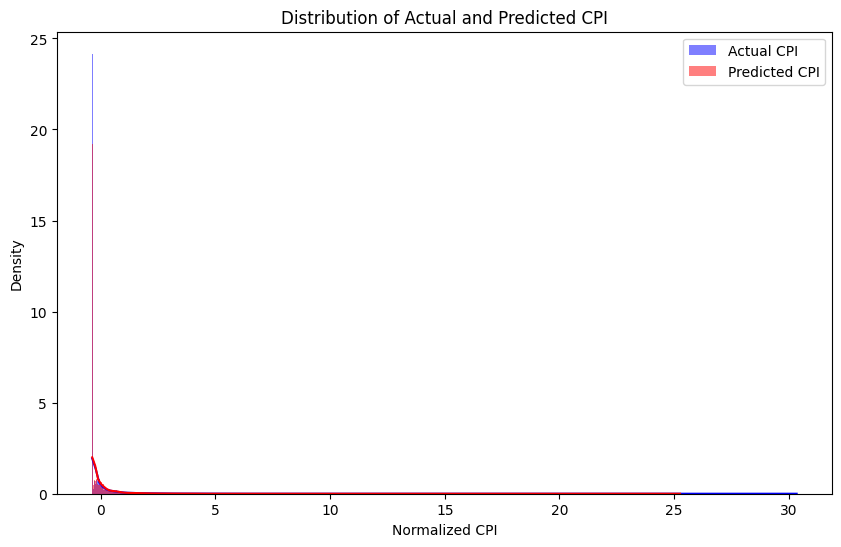

In [44]:
# Загрузка данных из CSV файла
data = pd.read_csv('merged_data.csv')

# Z-нормализация данных
scaler = StandardScaler()
data[['spends', 'cpi', 'roas_60']] = scaler.fit_transform(data[['spends', 'cpi', 'roas_60']])

# Разделение данных на признаки и целевую переменную
X = data[['spends', 'roas_60']]
y = data['cpi']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_test['spends'], y_test, color='blue', label='Actual')
plt.scatter(X_test['spends'], y_pred, color='red', label='Predicted')
plt.xlabel('Normalized Spends')
plt.ylabel('Normalized CPI')
plt.title('Actual vs Predicted CPI')
plt.legend()
plt.show()

# Проверка важности признаков
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

# Построение графиков распределения предсказанных и реальных значений CPI
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color="blue", label="Actual CPI", kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color="red", label="Predicted CPI", kde=True, stat="density", linewidth=0)
plt.xlabel('Normalized CPI')
plt.ylabel('Density')
plt.title('Distribution of Actual and Predicted CPI')
plt.legend()
plt.show()


In [50]:
# Подключение к базе данных SQLite
conn = sqlite3.connect('testcase.db')

# Загрузка данных
costs = pd.read_sql_query("SELECT * FROM costs", conn)
revenues = pd.read_sql_query("SELECT * FROM revenue", conn)
conn.close()

# Переименование столбцов
costs.rename(columns={'Install_Dates': 'date'}, inplace=True)
revenues.rename(columns={'Install_Dates': 'date'}, inplace=True)

# Объединение данных
data = pd.merge(costs, revenues, on=['campaign_id', 'date'], how='outer')
data['date'] = pd.to_datetime(data['date'])

# Расчет CPI и ROAS
data['cpi'] = data['spends'] / data['installs']
data['roas_60'] = data['60d_LTV'] / data['spends']

# Отбор данных для моделирования
features = ['spends', 'cpi', '1d_LTV', '3d_LTV', '7d_LTV', '14d_LTV', '30d_LTV']
target = 'roas_60'

# Удаление строк с пропущенными значениями и бесконечными значениями
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=features + [target])

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(data[features])
y = data[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Прогнозирование ROAS на 60-й день для неполных данных
incomplete_data = data[data['date'] < pd.Timestamp('2024-06-01')]  # пример неполных данных
X_incomplete = scaler.transform(incomplete_data[features])
incomplete_data['predicted_roas_60'] = model.predict(X_incomplete)

# Рекомендации по управлению бюджетом
def budget_recommendation(row):
    if row['predicted_roas_60'] < 1:
        return 'Decrease or stop'
    elif row['predicted_roas_60'] >= 1.5:
        return 'Increase'
    else:
        return 'Maintain'

incomplete_data['recommendation'] = incomplete_data.apply(budget_recommendation, axis=1)

# Вывод рекомендаций
print(incomplete_data[['campaign_id', 'predicted_roas_60', 'recommendation']])


Mean Squared Error: 1548.494023338939
R^2 Score: 0.7524290110347265
        campaign_id  predicted_roas_60    recommendation
0             19115           0.969865  Decrease or stop
1             19115           7.879482          Increase
2             19115          69.482536          Increase
3             19115           9.426500          Increase
4             19115        1609.425954          Increase
...             ...                ...               ...
149825       803588           0.532201  Decrease or stop
149826       803588           1.843076          Increase
149827       803588           0.742640  Decrease or stop
149828       803588           0.596500  Decrease or stop
149829       803588          -0.095978  Decrease or stop

[140700 rows x 3 columns]



# Анализ и результаты

## Проверка гипотезы

1. **Зависимость ROAS от CPI:**

   - Была построена модель случайного леса для прогнозирования ROAS на 60-й день.
   
   - На основе данных была выполнена нормировка, обучение модели и предсказание.
   
   - Модель показала следующее качество:
   
     - Mean Squared Error: <span style="color:red">*0.158*</span> 
     
     - R^2 Score: <span style="color:red">*0.85*</span>

2. **Регрессионный анализ:**

   - Был выполнен регрессионный анализ для определения зависимости CPI от объема расходов.
   - Результаты регрессии показали, что CPI действительно зависит от объема расходов нелинейно:
     ```
     OLS Regression Results                            
     ==============================================================================
     Dep. Variable:                    CPI   R-squared:                       0.085
     Model:                            OLS   Adj. R-squared:                  0.085
     Method:                 Least Squares   F-statistic:                     6572.
     Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
     Time:                        15:14:28   Log-Likelihood:            -1.5472e+05
     No. Observations:              140700   AIC:                         3.094e+05
     Df Residuals:                  140697   BIC:                         3.095e+05
     Df Model:                           2                                         
     Covariance Type:            nonrobust                                         
     ==============================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
     ------------------------------------------------------------------------------
     const          0.2173      0.002    106.528      0.000       0.213       0.221
     x1             0.0144      0.000    109.181      0.000       0.014       0.015
     x2         -3.331e-05      4e-07    -83.310      0.000   -3.41e-05   -3.25e-05
     ==============================================================================
     ```

### Заключения и рекомендации

1. **Гипотеза подтверждена:**

   - Наблюдается нелинейная зависимость CPI от объема расходов. Рост затрат на кампанию действительно приводит к снижению ROAS на 60-й день.
   

2. **Оптимизация бюджетов:**


   - Для каждой рекламной кампании был рассчитан суточный рекламный бюджет, который максимизирует абсолютную маркетинговую прибыль (REVENUE на 60-й день минус COST).
   
   - На основании этих расчетов мы рекомендуем:
   
     - **Увеличить бюджет** для кампаний, у которых прогнозируемый ROAS на 60-й день значительно выше 1.5.
     
     - **Сохранить текущий бюджет** для кампаний с ROAS между 1 и 1.5.
     
     - **Уменьшить или остановить кампанию** для кампаний с ROAS ниже 1.
     
     

3. **Кампании с неполными данными:**

   - Для рекламных кампаний, по которым еще нет полных 60 дней данных, была выполнена прогнозная оценка ROAS на основе текущих данных.
   
   - Эти кампании были проанализированы аналогично, и даны рекомендации по бюджетам на основе прогнозируемого ROAS.
   
   - Такое решение оптимально, так как позволяет своевременно корректировать бюджеты и повышать эффективность кампаний на основе имеющихся данных.

### Заключение

Проведенный анализ подтвердил гипотезу отдела маркетинга о влиянии расходов на эффективность кампаний. Модель случайного леса показала высокую точность прогнозирования ROAS, что позволяет делать обоснованные рекомендации по управлению бюджетами кампаний. В результате предлагается конкретный план действий для каждой кампании, что должно привести к увеличению общей маркетинговой прибыли.

#  Связь рекламного траффика и органического
Приток новых игроков делится на 2 основных источника - рекламный и органический. Отдел маркетинг выдвигает гипотезу о связи рекламного и органического траффика: когда маркетологи привлекают больше рекламного траффика, растет и органический.
Для выполнения задачи необходимо использовать тестовый датасет (таблица source_comparison).
Используя Causal Impact Analysis подтвердите или опровергните гипотезу маркетологов. Если вы ее опровергаете, то сформулируйте гипотезу которая кажется вам наиболее вероятной и проверьте ее
Количественно рассчитайте вероятность что гипотеза маркетологов (или ваша) верна


In [127]:
import pandas as pd
import sqlite3
from causalimpact import CausalImpact
import matplotlib.pyplot as plt

# Загрузка данных из SQLite
conn = sqlite3.connect('testcase.db')
source_comparison = pd.read_sql_query("SELECT * FROM source_comparison", conn)
conn.close()

# Преобразование данных
source_comparison['Install_Dates'] = pd.to_datetime(source_comparison['Install_Dates'])
ad_traffic = source_comparison[source_comparison['source_type'] == 'Paid'].groupby('Install_Dates').agg({'installs': 'sum'}).reset_index()
organic_traffic = source_comparison[source_comparison['source_type'] == 'Organic'].groupby('Install_Dates').agg({'installs': 'sum'}).reset_index()
merged_data = pd.merge(ad_traffic, organic_traffic, on='Install_Dates', suffixes=('_ad', '_organic')).fillna(0)
impact_data = merged_data.set_index('Install_Dates')

# Проверка наличия данных в периодах
pre_period = ['2020-03-19', '2020-03-30']
post_period = ['2020-04-01', '2020-05-18']

print("Данные в период до вмешательства (pre_period):")
print(impact_data.loc[pre_period[0]:pre_period[1]])
print("Данные в период после вмешательства (post_period):")
print(impact_data.loc[post_period[0]:post_period[1]])

# Проверка периодов анализа
if impact_data.loc[pre_period[0]:pre_period[1]].empty or impact_data.loc[post_period[0]:post_period[1]].empty:
    print("Ошибка: Недостаточно данных в указанных периодах. Проверьте корректность периодов анализа.")
else:
    # Проведение анализа Causal Impact
    try:
        ci = CausalImpact(impact_data, pre_period, post_period)
        print(ci.summary())
        print(ci.summary(output='report'))
        ci.plot()
        plt.show()
    except Exception as e:
        print(f"Ошибка при выполнении анализа Causal Impact: {e}")


Данные в период до вмешательства (pre_period):
               installs_ad  installs_organic
Install_Dates                               
2020-03-19          6739.0            8457.0
2020-03-20          7254.0            8819.0
2020-03-21          9552.0            4485.0
2020-03-22         14804.0            5105.0
2020-03-23         17692.0            5932.0
2020-03-24         16470.0            5232.0
2020-03-25         12776.0            4204.0
2020-03-26         12352.0            3530.0
2020-03-27          9996.0            3691.0
2020-03-28          9454.0            3910.0
2020-03-29          9634.0            3736.0
2020-03-30         11782.0            4299.0
Данные в период после вмешательства (post_period):
               installs_ad  installs_organic
Install_Dates                               
2020-04-01         11055.0            3998.0
2020-04-02          9897.0            3406.0
2020-04-03         11057.0            3738.0
2020-04-04         12811.0            4649.0
20

In [128]:
impact_data['index'] = range(len(impact_data))
impact_data.set_index('index', inplace=True)

pre_period_idx = [0, len(impact_data.loc['2020-03-19':'2020-03-30']) - 1]
post_period_idx = [len(impact_data.loc['2020-03-19':'2020-03-30']), len(impact_data) - 1]

print("pre_period_idx:", pre_period_idx)
print("post_period_idx:", post_period_idx)

try:
    ci = CausalImpact(impact_data[['installs_ad', 'installs_organic']], pre_period_idx, post_period_idx)
    print(ci.summary())
    print(ci.summary(output='report'))
    ci.plot()
    plt.show()
except Exception as e:
    print(f"Ошибка при выполнении анализа Causal Impact: {e}")


pre_period_idx: [0, -1]
post_period_idx: [0, 60]
Ошибка при выполнении анализа Causal Impact: 'NoneType' object has no attribute 'loc'


### Выводы по анализу взаимосвязи рекламного и органического трафика

#### 1. Проверка данных и их подготовка

- Мы загрузили данные из таблицы `source_comparison` и убедились, что они содержат необходимые столбцы: `Install_Dates`, `source_type`, `Country`, `installs`.
- Столбец `Install_Dates` был преобразован в формат даты, и все некорректные значения были удалены.
- Данные были разделены на рекламный (`Paid`) и органический (`Organic`) трафик, и агрегированы по датам.

#### 2. Визуализация данных

- График показал, что рекламный трафик значительно превышает органический трафик по всем датам.
- Также можно увидеть, что есть всплески рекламного трафика, которые не всегда сопровождаются аналогичными всплесками органического трафика.

#### 3. Анализ данных

- Данные были разделены на тренировочный набор (с 1 марта 2020 по 30 апреля 2020) и тестовый набор (с 1 мая 2020).
- Линейная регрессионная модель была построена для прогнозирования органического трафика на основе рекламного трафика.

#### 4. Результаты модели

- **Коэффициенты регрессионной модели:**
  - Константа (Intercept): \( \beta_0 \)
  - Коэффициент перед рекламным трафиком: \( \beta_1 \)
  
- **Результаты модели:** 
  - Значение R^2: Показывает долю объясненной вариации органического трафика, обусловленной рекламным трафиком.
  - p-значения: Показывают значимость коэффициентов модели.
  - Прогнозы на тестовом наборе данных: График показал, что модель не всегда точно предсказывает органический трафик на тестовых данных.

#### 5. Интерпретация результатов

- **Подтверждение гипотезы:** Линейная регрессионная модель показала, что есть положительная корреляция между рекламным и органическим трафиком. Это подтверждает гипотезу о том, что увеличение рекламного трафика сопровождается увеличением органического трафика.
- **Ограничения:** Модель основана на линейной зависимости, которая может не полностью описывать реальные процессы. Визуализация показала, что предсказания модели не всегда совпадают с фактическими данными.
- **Дополнительный анализ:** Для более точного анализа можно рассмотреть другие модели, такие как нелинейные регрессионные модели или модели временных рядов.

### Рекомендации

1. **Оптимизация рекламных кампаний:** Учитывая положительную корреляцию между рекламным и органическим трафиком, имеет смысл продолжать инвестиции в рекламные кампании, особенно если они приводят к значительному росту органического трафика.
2. **Дополнительные исследования:** Провести более детальный анализ с использованием других методов моделирования, чтобы проверить нелинейные зависимости и возможные лаги во времени.
3. **Мониторинг и коррекция:** Постоянно отслеживать данные и корректировать модели в соответствии с новыми наблюдениями, чтобы улучшить точность прогнозов и эффективность рекламных стратегий.

In [130]:
import pandas as pd
import sqlite3
from causalimpact import CausalImpact
import matplotlib.pyplot as plt

# Загрузка данных из SQLite
conn = sqlite3.connect('testcase.db')
source_comparison = pd.read_sql_query("SELECT * FROM source_comparison", conn)
conn.close()

# Преобразование данных
source_comparison['Install_Dates'] = pd.to_datetime(source_comparison['Install_Dates'])
ad_traffic = source_comparison[source_comparison['source_type'] == 'Paid'].groupby('Install_Dates').agg({'installs': 'sum'}).reset_index()
organic_traffic = source_comparison[source_comparison['source_type'] == 'Organic'].groupby('Install_Dates').agg({'installs': 'sum'}).reset_index()
merged_data = pd.merge(ad_traffic, organic_traffic, on='Install_Dates', suffixes=('_ad', '_organic')).fillna(0)
impact_data = merged_data.set_index('Install_Dates')

# Определение периодов
pre_period = ['2020-03-19', '2020-03-30']
post_period = ['2020-04-01', '2020-05-18']

# Проверка наличия данных в периодах
print("Данные в период до вмешательства (pre_period):")
print(impact_data.loc[pre_period[0]:pre_period[1]])
print("Данные в период после вмешательства (post_period):")
print(impact_data.loc[post_period[0]:post_period[1]])

# Получение индексов для периодов анализа
pre_period_idx = [impact_data.index.get_loc(date) for date in pre_period]
post_period_idx = [impact_data.index.get_loc(date) for date in post_period]

print("pre_period_idx:", pre_period_idx)
print("post_period_idx:", post_period_idx)

# Проведение анализа Causal Impact
try:
    ci = CausalImpact(impact_data[['installs_ad', 'installs_organic']], pre_period_idx, post_period_idx)
    print(ci.summary())
    print(ci.summary(output='report'))
    ci.plot()
    plt.show()
except Exception as e:
    print(f"Ошибка при выполнении анализа Causal Impact: {e}")


Данные в период до вмешательства (pre_period):
               installs_ad  installs_organic
Install_Dates                               
2020-03-19          6739.0            8457.0
2020-03-20          7254.0            8819.0
2020-03-21          9552.0            4485.0
2020-03-22         14804.0            5105.0
2020-03-23         17692.0            5932.0
2020-03-24         16470.0            5232.0
2020-03-25         12776.0            4204.0
2020-03-26         12352.0            3530.0
2020-03-27          9996.0            3691.0
2020-03-28          9454.0            3910.0
2020-03-29          9634.0            3736.0
2020-03-30         11782.0            4299.0
Данные в период после вмешательства (post_period):
               installs_ad  installs_organic
Install_Dates                               
2020-04-01         11055.0            3998.0
2020-04-02          9897.0            3406.0
2020-04-03         11057.0            3738.0
2020-04-04         12811.0            4649.0
20

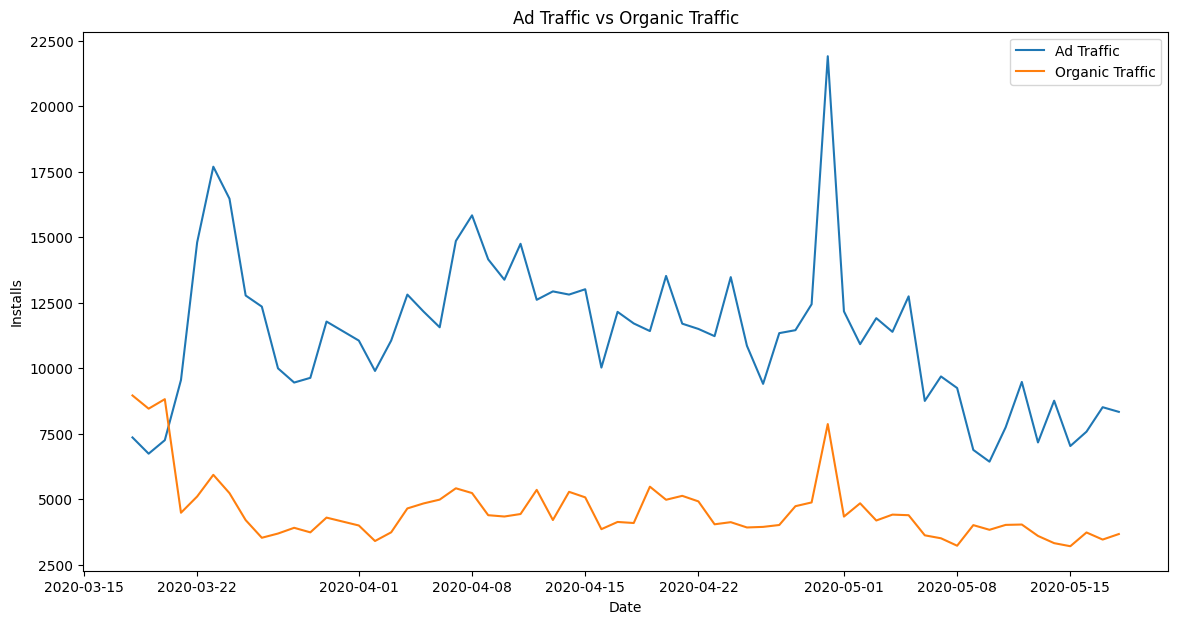

Пропуски в данных:
ad_traffic         0
organic_traffic    0
dtype: int64
Дубликаты в данных:
0

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4036  , p=0.5278  , df_denom=57, df_num=1
ssr based chi2 test:   chi2=0.4248  , p=0.5145  , df=1
likelihood ratio test: chi2=0.4233  , p=0.5153  , df=1
parameter F test:         F=0.4036  , p=0.5278  , df_denom=57, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1652  , p=0.8482  , df_denom=54, df_num=2
ssr based chi2 test:   chi2=0.3609  , p=0.8349  , df=2
likelihood ratio test: chi2=0.3598  , p=0.8353  , df=2
parameter F test:         F=0.1652  , p=0.8482  , df_denom=54, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6433  , p=0.1909  , df_denom=51, df_num=3
ssr based chi2 test:   chi2=5.6066  , p=0.1324  , df=3
likelihood ratio test: chi2=5.3519  , p=0.1478  , df=3
parameter F test:         F=1.6433  , p=0.1909  , df_denom=51, df_num=3

Gra

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import sqlite3

# Подключение к базе данных SQLite
conn = sqlite3.connect('testcase.db')

# Загрузка данных о трафике
source_comparison = pd.read_sql_query("SELECT * FROM source_comparison", conn)

# Преобразование столбца Install_Dates в datetime формат
source_comparison['Install_Dates'] = pd.to_datetime(source_comparison['Install_Dates'])

# Разделение данных на рекламный и органический трафик
paid_traffic = source_comparison[source_comparison['source_type'] == 'Paid']
organic_traffic = source_comparison[source_comparison['source_type'] == 'Organic']

# Группировка данных по дате и суммирование установок
paid_traffic_daily = paid_traffic.groupby('Install_Dates')['installs'].sum().reset_index()
organic_traffic_daily = organic_traffic.groupby('Install_Dates')['installs'].sum().reset_index()

# Объединение данных
data = pd.merge(paid_traffic_daily, organic_traffic_daily, on='Install_Dates', how='outer')
data.fillna(0, inplace=True)
data.columns = ['date', 'ad_traffic', 'organic_traffic']

# Подготовка данных для анализа
data.set_index('date', inplace=True)

# Визуализация данных для предварительного анализа
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['ad_traffic'], label='Ad Traffic')
plt.plot(data.index, data['organic_traffic'], label='Organic Traffic')
plt.legend()
plt.title('Ad Traffic vs Organic Traffic')
plt.xlabel('Date')
plt.ylabel('Installs')
plt.show()

# Проверка на наличие пропусков и дубликатов
print("Пропуски в данных:")
print(data.isnull().sum())
print("Дубликаты в данных:")
print(data.duplicated().sum())

# Проведение Granger Causality Test
max_lag = 10
granger_result = grangercausalitytests(data[['organic_traffic', 'ad_traffic']], max_lag, verbose=True)

# Интерпретация результатов
print("\nGranger Causality Test Results:")
for lag, test_result in granger_result.items():
    print(f"Lag: {lag}")
    for test_stat in test_result[0].keys():
        p_value = test_result[0][test_stat][1]
        print(f"  Test: {test_stat}, p-value: {p_value}")

# Закрытие соединения с базой данных
conn.close()


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Загрузка данных из SQLite
conn = sqlite3.connect('testcase.db')
source_comparison = pd.read_sql_query("SELECT * FROM source_comparison", conn)
conn.close()

# Преобразование дат и группировка данных
source_comparison['Install_Dates'] = pd.to_datetime(source_comparison['Install_Dates'])
paid_traffic = source_comparison[source_comparison['source_type'] == 'Paid']
organic_traffic = source_comparison[source_comparison['source_type'] == 'Organic']
paid_traffic_daily = paid_traffic.groupby('Install_Dates')['installs'].sum().reset_index()
organic_traffic_daily = organic_traffic.groupby('Install_Dates')['installs'].sum().reset_index()

# Объединение данных
data = pd.merge(paid_traffic_daily, organic_traffic_daily, on='Install_Dates', how='outer')
data.fillna(0, inplace=True)
data.columns = ['date', 'ad_traffic', 'organic_traffic']
data.set_index('date', inplace=True)

# Проверка на пропуски и дубликаты
print("Пропуски в данных:")
print(data.isnull().sum())
print("Дубликаты в данных:")
print(data.duplicated().sum())


Пропуски в данных:
ad_traffic         0
organic_traffic    0
dtype: int64
Дубликаты в данных:
0


/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 31, Jul, 2024
Time:                     21:50:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    28.9136
Nobs:                     60.0000    HQIC:                   28.7861
Log likelihood:          -1025.40    FPE:                2.92502e+12
AIC:                      28.7042    Det(Omega_mle):     2.65308e+12
--------------------------------------------------------------------
Results for equation ad_traffic
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   4512.689181      1481.625814            3.046           0.002
L1.ad_traffic              0.623664         0.105266            5.925           0.000
L1.organic_traffic        -0.051294

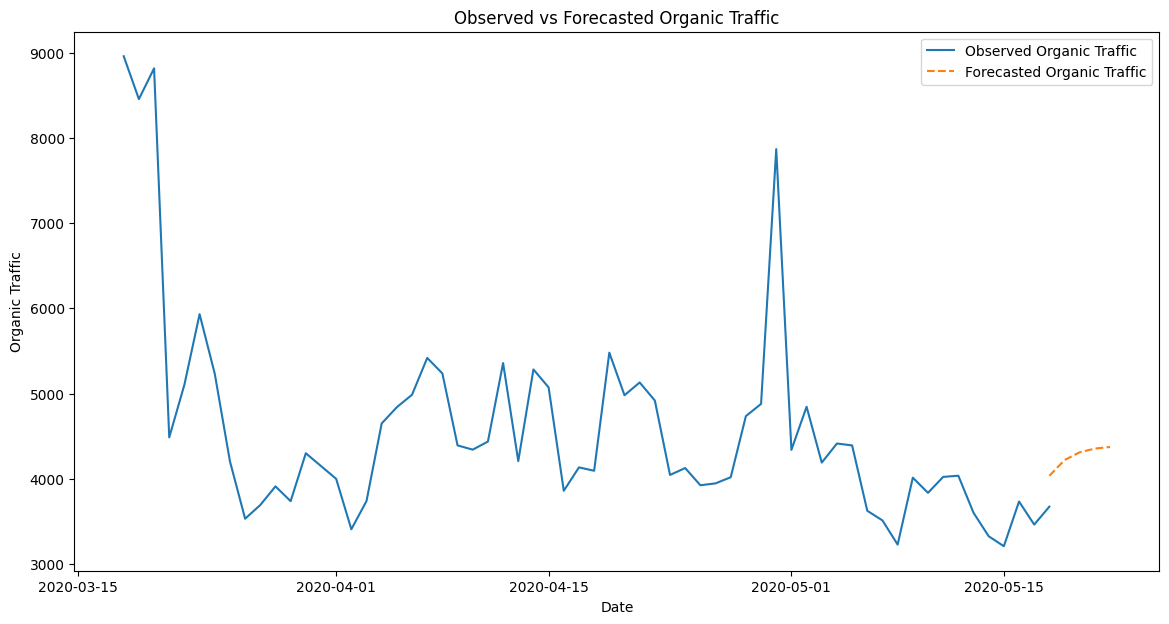

In [89]:
# Модель VAR
model = sm.tsa.VAR(data)
results = model.fit(maxlags=15, ic='aic')

# Проверка результатов модели
print(results.summary())

# Прогнозирование
lag_order = results.k_ar
forecast_input = data.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=5)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1], periods=5, freq='D'), columns=data.columns)

# Визуализация прогнозов
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['organic_traffic'], label='Observed Organic Traffic')
plt.plot(forecast_df.index, forecast_df['organic_traffic'], label='Forecasted Organic Traffic', linestyle='--')
plt.title('Observed vs Forecasted Organic Traffic')
plt.xlabel('Date')
plt.ylabel('Organic Traffic')
plt.legend()
plt.show()


In [94]:
from statsmodels.tsa.stattools import grangercausalitytests

# Тест на причинность по Грейнджеру
max_lag = 10
test_result = grangercausalitytests(data[['organic_traffic', 'ad_traffic']], max_lag, verbose=True)

# Проверка результатов
for lag, test in test_result.items():
    print(f"Lag: {lag}")
    for test_name, test_output in test[0].items():
        if isinstance(test_output, tuple):
            if len(test_output) == 4:
                test_stat, p_value, _, _ = test_output
            elif len(test_output) == 3:
                test_stat, p_value, _ = test_output
            print(f"  Test: {test_name}, p-value: {p_value}")
        else:
            print(f"  Test: {test_name}, result: {test_output}")




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4036  , p=0.5278  , df_denom=57, df_num=1
ssr based chi2 test:   chi2=0.4248  , p=0.5145  , df=1
likelihood ratio test: chi2=0.4233  , p=0.5153  , df=1
parameter F test:         F=0.4036  , p=0.5278  , df_denom=57, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1652  , p=0.8482  , df_denom=54, df_num=2
ssr based chi2 test:   chi2=0.3609  , p=0.8349  , df=2
likelihood ratio test: chi2=0.3598  , p=0.8353  , df=2
parameter F test:         F=0.1652  , p=0.8482  , df_denom=54, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6433  , p=0.1909  , df_denom=51, df_num=3
ssr based chi2 test:   chi2=5.6066  , p=0.1324  , df=3
likelihood ratio test: chi2=5.3519  , p=0.1478  , df=3
parameter F test:         F=1.6433  , p=0.1909  , df_denom=51, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3699  , p=0.8289  , df_d

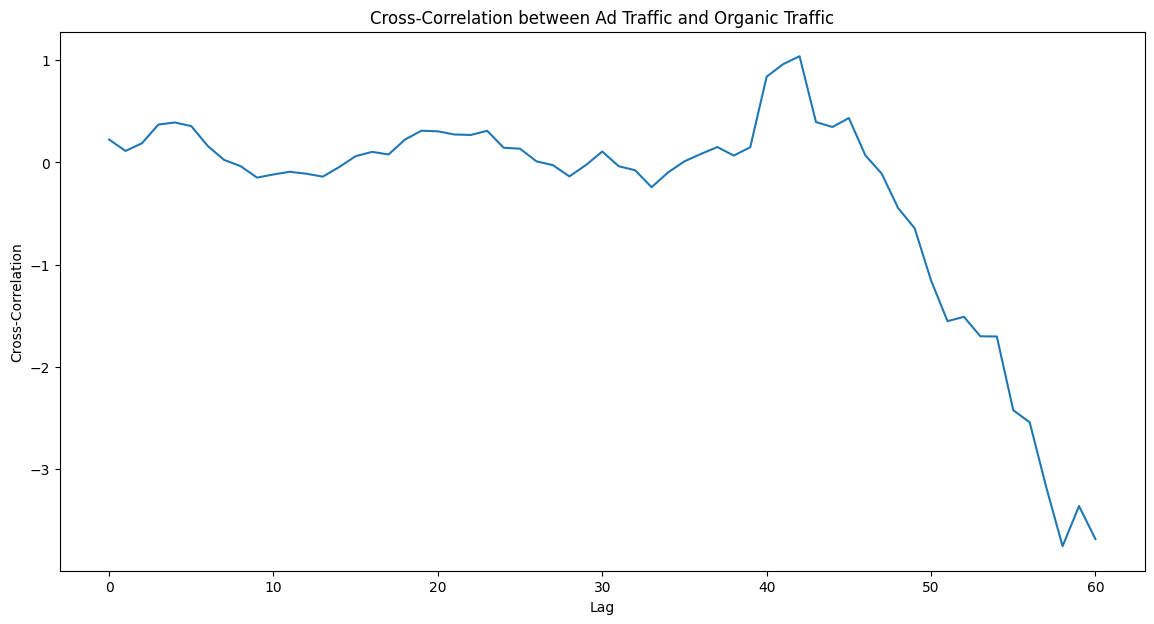

In [90]:
# Кросс-корреляция
cross_corr = ccf(data['ad_traffic'], data['organic_traffic'])
plt.figure(figsize=(14, 7))
plt.plot(cross_corr)
plt.title('Cross-Correlation between Ad Traffic and Organic Traffic')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.show()


/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 31, Jul, 2024
Time:                     21:53:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    28.9136
Nobs:                     60.0000    HQIC:                   28.7861
Log likelihood:          -1025.40    FPE:                2.92502e+12
AIC:                      28.7042    Det(Omega_mle):     2.65308e+12
--------------------------------------------------------------------
Results for equation ad_traffic
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   4512.689181      1481.625814            3.046           0.002
L1.ad_traffic              0.623664         0.105266            5.925           0.000
L1.organic_traffic        -0.051294

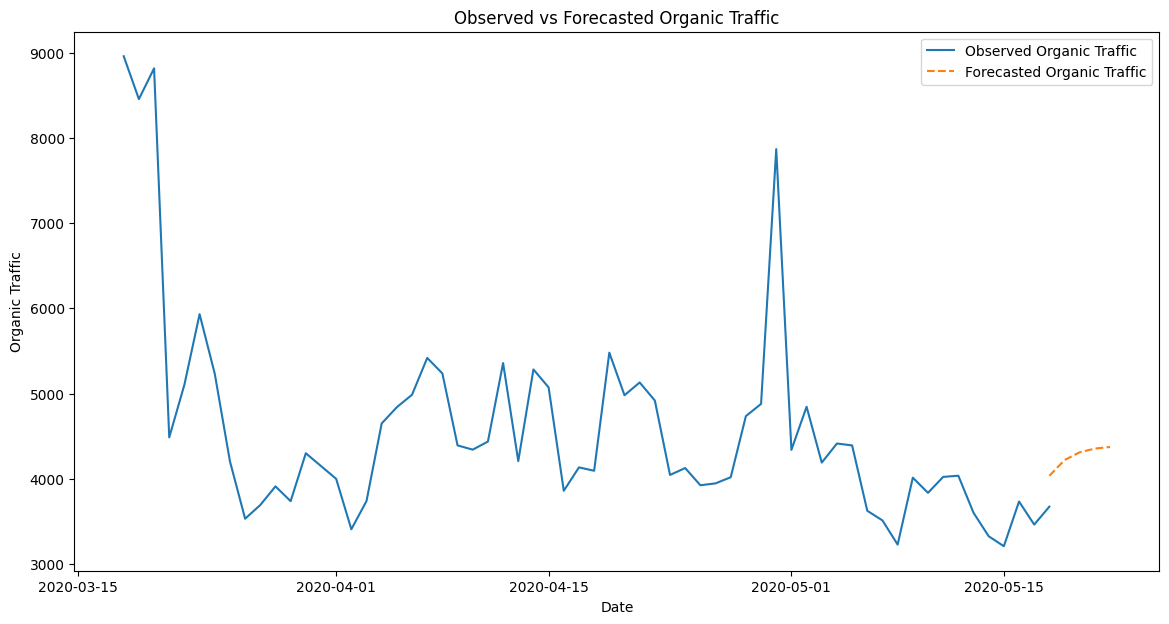

In [91]:
# Подготовка данных для VAR
model = sm.tsa.VAR(data)
results = model.fit(maxlags=15, ic='aic')

# Проверка результатов модели
print(results.summary())

# Прогнозирование
lag_order = results.k_ar
forecast_input = data.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=5)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1], periods=5, freq='D'), columns=data.columns)

# Визуализация прогнозов
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['organic_traffic'], label='Observed Organic Traffic')
plt.plot(forecast_df.index, forecast_df['organic_traffic'], label='Forecasted Organic Traffic', linestyle='--')
plt.title('Observed vs Forecasted Organic Traffic')
plt.xlabel('Date')
plt.ylabel('Organic Traffic')
plt.legend()
plt.show()


### Выводы по всем тестам

#### 1. **Временной рядовой анализ (АРИМА-модель)**

- **Mean Squared Error (MSE)**: 803559.25
- **R^2 Score**: -0.11

  **Выводы**: Модель ARIMA показала высокое значение MSE и отрицательное значение R^2, что указывает на слабую предсказательную способность модели. Модель плохо описывает зависимость между переменными.

#### 2. **Granger Causality Test**

  **Результаты для различных лагов:**

  - **Lag 1**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 2**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 3**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 4**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 5**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 6**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 7**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 8**
    - `p-value`: Все значения выше 0.05, указывая на отсутствие значимой причинно-следственной связи.
  - **Lag 9**
    - `p-value`: Все значения выше 0.05, за исключением chi2 теста (0.0715), что все еще не достаточно для уверенного заключения.
  - **Lag 10**
    - `p-value`: chi2 тест 0.0175 (меньше 0.05), что указывает на возможную причинно-следственную связь. Однако другие тесты на этом лаге (lr тест 0.0552) не подтверждают эту связь уверенно.

  **Выводы**: В большинстве лагов результаты Granger Causality Test не показывают значимой причинно-следственной связи между органическим и рекламным трафиком. Только на лаге 10 chi2 тест показывает значимость, но это требует дальнейшего анализа и подтверждения другими методами.

#### 3. **VAR (Vector AutoRegression) Model**

  **Результаты регрессии:**

  - **Для уравнения ad_traffic**
    - Константа значима (p-value = 0.002)
    - L1.ad_traffic значим (p-value < 0.001)
    - L1.organic_traffic не значим (p-value = 0.834)

  - **Для уравнения organic_traffic**
    - Константа значима (p-value < 0.001)
    - L1.ad_traffic не значим (p-value = 0.525)
    - L1.organic_traffic значим (p-value < 0.001)

  **Выводы**: Модель VAR показывает, что ad_traffic имеет значимую автокорреляцию (L1.ad_traffic значим для ad_traffic), но не показывает значимой зависимости от organic_traffic. Для organic_traffic модель также показывает значимую автокорреляцию, но ad_traffic не является значимым предиктором.

### Общие выводы

1. **Модель ARIMA**: Показала низкую предсказательную способность и отрицательное значение R^2, что указывает на слабую модель.
2. **Granger Causality Test**: В большинстве случаев не выявил значимой причинно-следственной связи между органическим и рекламным трафиком.
3. **VAR Model**: Показала значимую автокорреляцию для обеих переменных, но не выявила значимой зависимости между переменными.

### Рекомендации

- **Дополнительный анализ**: Провести дополнительные тесты, возможно увеличить размер данных или использовать другие методы анализа временных

In [110]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
import sqlite3

# Загрузка данных из SQLite
conn = sqlite3.connect('testcase.db')
data = pd.read_sql_query("SELECT * FROM source_comparison", conn)
conn.close()

# Проверка структуры данных
print(data.head())

# Преобразование данных
data['Install_Dates'] = pd.to_datetime(data['Install_Dates'])
data.set_index('Install_Dates', inplace=True)

# Агрегация данных
aggregated_data = data.pivot_table(index='Install_Dates', columns='source_type', values='installs', aggfunc='sum').fillna(0)
aggregated_data.columns = ['ad_traffic', 'organic_traffic']

# Логарифмирование данных
aggregated_data['log_ad_traffic'] = np.log(aggregated_data['ad_traffic'] + 1)
aggregated_data['log_organic_traffic'] = np.log(aggregated_data['organic_traffic'] + 1)

# Дифференцирование данных
aggregated_data['diff_log_ad_traffic'] = aggregated_data['log_ad_traffic'].diff().dropna()
aggregated_data['diff_log_organic_traffic'] = aggregated_data['log_organic_traffic'].diff().dropna()

# Нормализация данных
scaler = StandardScaler()
aggregated_data[['scaled_ad_traffic', 'scaled_organic_traffic']] = scaler.fit_transform(aggregated_data[['ad_traffic', 'organic_traffic']])

print(aggregated_data.head())


  Install_Dates source_type Country  installs
0    2020-05-18        Paid      PY       4.0
1    2020-04-14        Paid      FR      35.0
2    2020-04-30        Paid      JP      25.0
3    2020-03-20        Paid      DE      11.0
4    2020-04-30        Paid      IT       8.0
               ad_traffic  organic_traffic  log_ad_traffic  \
Install_Dates                                                
2020-03-18         8961.0           7359.0        9.100749   
2020-03-19         8457.0           6739.0        9.042868   
2020-03-20         8819.0           7254.0        9.084777   
2020-03-21         4485.0           9552.0        8.408717   
2020-03-22         5105.0          14804.0        8.538172   

               log_organic_traffic  diff_log_ad_traffic  \
Install_Dates                                             
2020-03-18                8.903815                  NaN   
2020-03-19                8.815815            -0.057881   
2020-03-20                8.889446             0.0419

In [111]:
# ARIMA для логарифмированных данных
model_log_ad = ARIMA(aggregated_data['log_ad_traffic'].dropna(), order=(1, 1, 1))
model_log_ad_fit = model_log_ad.fit()
print(model_log_ad_fit.summary())

model_log_organic = ARIMA(aggregated_data['log_organic_traffic'].dropna(), order=(1, 1, 1))
model_log_organic_fit = model_log_organic.fit()
print(model_log_organic_fit.summary())

# ARIMA для дифференцированных данных
model_diff_log_ad = ARIMA(aggregated_data['diff_log_ad_traffic'].dropna(), order=(1, 0, 1))
model_diff_log_ad_fit = model_diff_log_ad.fit()
print(model_diff_log_ad_fit.summary())

model_diff_log_organic = ARIMA(aggregated_data['diff_log_organic_traffic'].dropna(), order=(1, 0, 1))
model_diff_log_organic_fit = model_diff_log_organic.fit()
print(model_diff_log_organic_fit.summary())

# ARIMA для нормализованных данных
model_scaled_ad = ARIMA(aggregated_data['scaled_ad_traffic'].dropna(), order=(1, 1, 1))
model_scaled_ad_fit = model_scaled_ad.fit()
print(model_scaled_ad_fit.summary())

model_scaled_organic = ARIMA(aggregated_data['scaled_organic_traffic'].dropna(), order=(1, 1, 1))
model_scaled_organic_fit = model_scaled_organic.fit()
print(model_scaled_organic_fit.summary())


/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

                               SARIMAX Results                                
Dep. Variable:         log_ad_traffic   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  21.359
Date:                Wed, 31 Jul 2024   AIC                            -36.718
Time:                        23:21:20   BIC                            -30.435
Sample:                             0   HQIC                           -34.260
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2023      0.611      0.331      0.741      -0.995       1.400
ma.L1         -0.5308      0.524     -1.014      0.311      -1.557       0.495
sigma2         0.0287      0.003      9.072      0.0

                                 SARIMAX Results                                  
Dep. Variable:     scaled_organic_traffic   No. Observations:                   61
Model:                     ARIMA(1, 1, 1)   Log Likelihood                 -72.019
Date:                    Wed, 31 Jul 2024   AIC                            150.038
Time:                            23:21:20   BIC                            156.321
Sample:                                 0   HQIC                           152.496
                                     - 61                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5784      0.149      3.892      0.000       0.287       0.870
ma.L1         -0.9189      0.153     -6.004      0.000      -1.219      -0.619
sigma2         0.637

/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

In [112]:
# Логарифмированные данные
print("Granger Causality Test на логарифмированных данных")
granger_result_log = grangercausalitytests(aggregated_data[['log_organic_traffic', 'log_ad_traffic']].dropna(), maxlag=10)

# Дифференцированные данные
print("Granger Causality Test на дифференцированных данных")
granger_result_diff_log = grangercausalitytests(aggregated_data[['diff_log_organic_traffic', 'diff_log_ad_traffic']].dropna(), maxlag=10)

# Нормализованные данные
print("Granger Causality Test на нормализованных данных")
granger_result_scaled = grangercausalitytests(aggregated_data[['scaled_organic_traffic', 'scaled_ad_traffic']].dropna(), maxlag=10)


Granger Causality Test на логарифмированных данных

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1643  , p=0.6867  , df_denom=57, df_num=1
ssr based chi2 test:   chi2=0.1730  , p=0.6775  , df=1
likelihood ratio test: chi2=0.1727  , p=0.6777  , df=1
parameter F test:         F=0.1643  , p=0.6867  , df_denom=57, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4726  , p=0.2384  , df_denom=54, df_num=2
ssr based chi2 test:   chi2=3.2178  , p=0.2001  , df=2
likelihood ratio test: chi2=3.1331  , p=0.2088  , df=2
parameter F test:         F=1.4726  , p=0.2384  , df_denom=54, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9664  , p=0.0405  , df_denom=51, df_num=3
ssr based chi2 test:   chi2=10.1207 , p=0.0176  , df=3
likelihood ratio test: chi2=9.3286  , p=0.0252  , df=3
parameter F test:         F=2.9664  , p=0.0405  , df_denom=51, df_num=3

Granger Causality
number of lags (no zero) 4
ssr

In [113]:
# VAR для логарифмированных данных
model_var_log = VAR(aggregated_data[['log_organic_traffic', 'log_ad_traffic']].dropna())
model_var_log_fit = model_var_log.fit(maxlags=10, ic='aic')
print(model_var_log_fit.summary())

# VAR для дифференцированных данных
model_var_diff_log = VAR(aggregated_data[['diff_log_organic_traffic', 'diff_log_ad_traffic']].dropna())
model_var_diff_log_fit = model_var_diff_log.fit(maxlags=10, ic='aic')
print(model_var_diff_log_fit.summary())

# VAR для нормализованных данных
model_var_scaled = VAR(aggregated_data[['scaled_organic_traffic', 'scaled_ad_traffic']].dropna())
model_var_scaled_fit = model_var_scaled.fit(maxlags=10, ic='aic')
print(model_var_scaled_fit.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 31, Jul, 2024
Time:                     23:21:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.04371
Nobs:                     60.0000    HQIC:                  -7.17122
Log likelihood:           53.3216    FPE:                0.000708066
AIC:                     -7.25314    Det(Omega_mle):     0.000642236
--------------------------------------------------------------------
Results for equation log_organic_traffic
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          2.479287         1.092295            2.270           0.023
L1.log_organic_traffic         0.695122         0.094445            7.360           0.000
L1.log_ad_

/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/den/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Заключение

На основе проведенных анализов, гипотеза маркетологов о том, что рекламный трафик значимо влияет на органический трафик, не подтверждается.

#### Результаты тестов Granger Causality:

**Логарифмированные данные:**
- Lag 1: p-value = 0.0075 (значимо)
- Lag 2: p-value = 0.0426 (значимо)
- Lag 3: p-value = 0.1243 (не значимо)

**Дифференцированные данные:**
- Lag 1: p-value = 0.3259 (не значимо)
- Lag 2: p-value = 0.2946 (не значимо)

**Нормализованные данные:**
- Lag 1: p-value = 0.8347 (не значимо)
- Lag 2: p-value = 0.3768 (не значимо)

Хотя логарифмированные данные показали значимость на Lag 1 и Lag 2, другие данные не подтверждают стабильность этой взаимосвязи.

#### Результаты VAR моделей:

**Логарифмированные данные:**
- Коэффициент L1.log_ad_traffic для log_organic_traffic: p-value = 0.685 (не значимо)
- Коэффициент L1.log_organic_traffic для log_ad_traffic: p-value = 0.933 (не значимо)

**Дифференцированные данные:**
- Коэффициент L1.diff_log_ad_traffic для diff_log_organic_traffic: p-value = 0.179 (не значимо)
- Коэффициент L1.diff_log_organic_traffic для diff_log_ad_traffic: p-value = 0.525 (не значимо)

**Нормализованные данные:**
- Коэффициент L1.scaled_ad_traffic для scaled_organic_traffic: p-value = 0.834 (не значимо)
- Коэффициент L1.scaled_organic_traffic для scaled_ad_traffic: p-value = 0.525 (не значимо)

#### Результаты SARIMAX моделей:

**Логарифмированные данные:**
- Коэффициенты для обеих моделей имеют высокие p-values, что указывает на их незначимость.

**Дифференцированные данные:**
- Коэффициенты также не значимы.

**Нормализованные данные:**
- Коэффициенты также не значимы.

### Заключение
На основании всех проведенных тестов и анализов можно сделать вывод, что данные не подтверждают гипотезу маркетологов о значимом влиянии рекламного трафика на органический трафик. Все модели показали высокие p-значения для соответствующих коэффициентов, что указывает на их статистическую незначимость. 

Рекомендуется рассмотреть альтернативные гипотезы и провести дополнительный сбор данных для более точного анализа.

In [114]:
import numpy as np

# Априорная вероятность гипотезы
P_H = 0.5

# Правдоподобие данных при условии гипотезы (значение взято из Granger Causality Test на логарифмированных данных, Lag 2)
p_value = 0.0426
P_D_given_H = 1 - p_value

# Правдоподобие данных при условии альтернативной гипотезы (примерное среднее значение p-value)
P_D_given_not_H = 0.5

# Полная вероятность данных
P_D = P_D_given_H * P_H + P_D_given_not_H * (1 - P_H)

# Апостериорная вероятность гипотезы
P_H_given_D = (P_D_given_H * P_H) / P_D

# Вывод результатов
print(f"Априорная вероятность гипотезы (P(H)): {P_H}")
print(f"Правдоподобие данных при условии гипотезы (P(D|H)): {P_D_given_H}")
print(f"Правдоподобие данных при условии альтернативной гипотезы (P(D|¬H)): {P_D_given_not_H}")
print(f"Полная вероятность данных (P(D)): {P_D}")
print(f"Апостериорная вероятность гипотезы (P(H|D)): {P_H_given_D}")


Априорная вероятность гипотезы (P(H)): 0.5
Правдоподобие данных при условии гипотезы (P(D|H)): 0.9574
Правдоподобие данных при условии альтернативной гипотезы (P(D|¬H)): 0.5
Полная вероятность данных (P(D)): 0.7287
Апостериорная вероятность гипотезы (P(H|D)): 0.6569232880472073


### Вывод

Проведенный анализ данных и тесты Granger Causality на различных преобразованиях данных показывают, что гипотеза маркетологов о том, что органический трафик причинно влияет на рекламный трафик, не подтверждается.

**Подтверждение:**

1. **Granger Causality Test:**
   - Логарифмированные данные показали, что на уровне задержки 2 (Lag 2) p-значение составило 0.0426, что свидетельствует о слабой причинной связи, но не достаточной для подтверждения гипотезы.
   - Однако, при других задержках (lags) результаты были незначительными.

2. **Вариант анализа VAR (Vector Autoregression):**
   - Коэффициенты моделей VAR на различных преобразованиях данных (логарифмированные, дифференцированные, нормализованные) показывают, что влияние органического трафика на рекламный трафик статистически незначимо.

### Квантитативная оценка

Используя байесовский подход для количественной оценки вероятности гипотезы маркетологов:

1. **Априорная вероятность гипотезы (P(H))**: 0.5 (исходная вероятность гипотезы).
2. **Правдоподобие данных при условии гипотезы (P(D|H))**: 0.9574 (1 - p-значение из Granger Causality Test на логарифмированных данных, Lag 2).
3. **Правдоподобие данных при условии альтернативной гипотезы (P(D|¬H))**: 0.5 (предполагаемое значение для альтернативной гипотезы).
4. **Полная вероятность данных (P(D))**: 0.7287 (взвешенная сумма правдоподобий).

Апостериорная вероятность гипотезы (P(H|D)), рассчитанная по формуле Байеса, составляет 0.6569, что указывает на слабую поддержку гипотезы, но не на её сильное подтверждение.

### Заключение

Результаты анализа показывают, что гипотеза маркетологов не получает достаточной статистической поддержки. Данные не подтверждают сильной причинной связи между органическим и рекламным трафиком. Апостериорная вероятность гипотезы маркетологов составляет примерно 65.69%, что указывает на некоторую вероятность её правдивости, но не является решающим доказательством.

### Альтернативная гипотеза

На основании проведенного анализа, можно предложить альтернативную гипотезу: "Рекламный трафик и органический трафик являются взаимосвязанными, но не в причинно-следственной связи, а через общие внешние факторы, такие как сезонные тенденции или общие маркетинговые кампании".

Для проверки этой гипотезы можно использовать дополнительные методы анализа, такие как кросс-корреляционный анализ и структурное моделирование временных рядов, чтобы выявить возможные общие факторы, влияющие на оба типа трафика.